#  DOMAIN: Semiconductor manufacturing process

### CONTEXT: 
A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise.Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

### DATA DESCRIPTION: 

sensor-data.csv : (1567, 592)

The data consists of 1567 datapoints each with 591 features.

The dataset presented in this case represents a selection of such features where each example represents a single production entity with
associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to
a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

### PROJECT OBJECTIVE: We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

## Steps and tasks: 

### 1. Import and understand the data. 

#### Q1 A - Import ‘signal-data.csv’ as DataFrame.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
import warnings; warnings.filterwarnings('ignore') 



In [2]:
df_sensor = pd.read_csv("signal-data.csv")

In [3]:
df_sensor.head(10)

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   
5  2008-07-19 17:53:00  2946.25  2432.84  2233.3667  1326.5200  1.5334  100.0   
6  2008-07-19 19:44:00  3030.27  2430.12  2230.4222  1463.6606  0.8294  100.0   
7  2008-07-19 19:45:00  3058.88  2690.15  2248.9000  1004.4692  0.7884  100.0   
8  2008-07-19 20:24:00  2967.68  2600.47  2248.9000  1004.4692  0.7884  100.0   
9  2008-07-19 21:35:00  3016.11  2428.37  2248.9000  1004.4692  0.7884  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   
5  100.3967  0.1235  1.5287  ...   44.0077  0.4949  0.0189  0.0044   3.8276   
6  102.3433  0.1247  1.5816  ...       NaN  0.5010  0.0143  0.0042   2.8515   
7  106.2400  0.1185  1.5153  ...   95.0310  0.4984  0.0106  0.0034   2.1261   
8  106.2400  0.1185  1.5358  ...  111.6525  0.4993  0.0172  0.0046   3.4456   
9  106.2400  0.1185  1.5381  ...   90.2294  0.4967  0.0152  0.0038   3.0687   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  
5  0.0342  0.0151  0.0052   44.0077         -1  
6  0.0342  0.0151  0.0052   44.0077         -1  
7  0.0204  0.0194  0.0063   95.0310         -1  
8  0.0111  0.0124  0.0045  111.6525         -1  
9  0.0212  0.0191  0.0073   90.2294         -1  

[10 rows x 592 columns]

In [4]:
df_sensor.shape

(1567, 592)

#### Q1B - Print 5 point summary and share at least 2 observations.

In [5]:
df_sensor.describe()

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.000000     1.191000    -0.053400  ...   
25%     100.0    97.920000     0.121100     1.411200    -0.010800  ...   
50%     100.0   101.512200     0.122400     1.461600    -0.001300  ...   
75%     100.0   104.586700     0.123800     1.516900     0.008400  ...   
max     100.0   129.252200     0.128600     1.656400     0.074900  ...   

              581          582          583          584          585  \
count  618.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean    97.934373     0.500096     0.015318     0.003847     3.067826   
std     87.520966     0.003404     0.017180     0.003720     3.578033   
min      0.000000     0.477800     0.006000     0.001700     1.197500   
25%     46.184900     0.497900     0.011600     0.003100     2.306500   
50%     72.288900     0.500200     0.013800     0.003600     2.757650   
75%    116.539150     0.502375     0.016500     0.004100     3.295175   
max    737.304800     0.509800     0.476600     0.104500    99.303200   

               586          587          588          589    Pass/Fail  
count  1566.000000  1566.000000  1566.000000  1566.000000  1567.000000  
mean      0.021458     0.016475     0.005283    99.670066    -0.867262  
std       0.012358     0.008808     0.002867    93.891919     0.498010  
min      -0.016900     0.003200     0.001000     0.000000    -1.000000  
25%       0.013425     0.010600     0.003300    44.368600    -1.000000  
50%       0.020500     0.014800     0.004600    71.900500    -1.000000  
75%       0.027600     0.020300     0.006400   114.749700    -1.000000  
max       0.102800     0.079900     0.028600   737.304800     1.000000  

[8 rows x 591 columns]

In [6]:
df_sensor.describe().T

count         mean         std        min          25%        50%  \
0          1561.0  3014.452896   73.621787  2743.2400  2966.260000  3011.4900   
1          1560.0  2495.850231   80.407705  2158.7500  2452.247500  2499.4050   
2          1553.0  2200.547318   29.513152  2060.6600  2181.044400  2201.0667   
3          1553.0  1396.376627  441.691640     0.0000  1081.875800  1285.2144   
4          1553.0     4.197013   56.355540     0.6815     1.017700     1.3168   
...           ...          ...         ...        ...          ...        ...   
586        1566.0     0.021458    0.012358    -0.0169     0.013425     0.0205   
587        1566.0     0.016475    0.008808     0.0032     0.010600     0.0148   
588        1566.0     0.005283    0.002867     0.0010     0.003300     0.0046   
589        1566.0    99.670066   93.891919     0.0000    44.368600    71.9005   
Pass/Fail  1567.0    -0.867262    0.498010    -1.0000    -1.000000    -1.0000   

                 75%        max  
0          3056.6500  3356.3500  
1          2538.8225  2846.4400  
2          2218.0555  2315.2667  
3          1591.2235  3715.0417  
4             1.5257  1114.5366  
...              ...        ...  
586           0.0276     0.1028  
587           0.0203     0.0799  
588           0.0064     0.0286  
589         114.7497   737.3048  
Pass/Fail    -1.0000     1.0000  

[591 rows x 8 columns]

In [7]:
df_sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [8]:
df_sensor.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

Observations: 

1) Data seems to be skewed & some testing sensor signals has outliers(too much deflection of min,mean,max from median). 

2) Based on Standard Deviation Some Strong signals and weak signals. Or it migh be sensitivity and resolution of that particular sensor. It might be due to yield defect of waffles or sensitivity of sensors based on test signals. 

3) Lot of Null values to be treated and duplicate columns too. 

4) Time column should be drop. But sometimes its used for SAP Department to predict the faulty batch size at that particular time. 

5) Pass and Fail column should be turned to 1 and 0 for ease interpretation. 

6) Every sensor and testing with respect to the testing specimens plays a different role . Absence of signal can be imputed with 0 or mean or median based on sensor and testing method. That has to be confirmed with domain expert. 

7) Since in Manufacturing and Testing Process all the sensors installed for testing and parameter monitoring are used as they are connected to Control system. They are going to give constant values and if not working it will give null signal.  So many Features are important and Some Features can be dropped. So Featurewise/Columns has to be monitored to know which Feature is important and unwanted feature should be dropped. 

8) Remember important Feature means the sensor is giving contious signal output most of the time or should be influenceing target variable. As you can observe every row has different range of min, max and null.

### 2. Data cleansing: 

#### Q2 A - Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.

In [9]:
def show_null_columns(df_sensor, agg, threshold): #through aggregation 
    if agg == 'sum':
        null_cols = df_sensor.isnull().sum()
    elif agg == 'mean':
        null_cols = df_sensor.isnull().mean()
    columns = df_sensor.columns
    null_dic = {}
    for col,x in zip(columns, null_cols):
        if x>= threshold:
            null_dic[col] = x
    return null_dic

null_dic = show_null_columns(df_sensor, 'mean', 0.2) #mean for percentage alocation 
df_sensor2 = df_sensor.drop(null_dic.keys(), axis=1)

print("Before imputatuion /n",df_sensor2.isna().sum())
column_means = df_sensor2. mean()
df_sensor2 = df_sensor2. fillna(column_means)
print("After Imputatuion with mean",df_sensor2.isna().sum())

Before imputatuion /n Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 560, dtype: int64
After Imputatuion with mean Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 560, dtype: int64


In [10]:
df_sensor2.shape

(1567, 560)

In [11]:
df_sensor2.head(10)

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   
5  2008-07-19 17:53:00  2946.25  2432.84  2233.3667  1326.5200  1.5334  100.0   
6  2008-07-19 19:44:00  3030.27  2430.12  2230.4222  1463.6606  0.8294  100.0   
7  2008-07-19 19:45:00  3058.88  2690.15  2248.9000  1004.4692  0.7884  100.0   
8  2008-07-19 20:24:00  2967.68  2600.47  2248.9000  1004.4692  0.7884  100.0   
9  2008-07-19 21:35:00  3016.11  2428.37  2248.9000  1004.4692  0.7884  100.0   

          6       7       8  ...      577     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...  14.9509  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  10.9003  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   9.2721  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   8.5831  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...  10.9698  0.4800  0.4766  0.1045  99.3032   
5  100.3967  0.1235  1.5287  ...  13.7755  0.4949  0.0189  0.0044   3.8276   
6  102.3433  0.1247  1.5816  ...   8.3645  0.5010  0.0143  0.0042   2.8515   
7  106.2400  0.1185  1.5153  ...  16.0862  0.4984  0.0106  0.0034   2.1261   
8  106.2400  0.1185  1.5358  ...  14.2892  0.4993  0.0172  0.0046   3.4456   
9  106.2400  0.1185  1.5381  ...   7.4181  0.4967  0.0152  0.0038   3.0687   

        586       587       588         589  Pass/Fail  
0  0.021458  0.016475  0.005283   99.670066         -1  
1  0.009600  0.020100  0.006000  208.204500         -1  
2  0.058400  0.048400  0.014800   82.860200          1  
3  0.020200  0.014900  0.004400   73.843200         -1  
4  0.020200  0.014900  0.004400   73.843200         -1  
5  0.034200  0.015100  0.005200   44.007700         -1  
6  0.034200  0.015100  0.005200   44.007700         -1  
7  0.020400  0.019400  0.006300   95.031000         -1  
8  0.011100  0.012400  0.004500  111.652500         -1  
9  0.021200  0.019100  0.007300   90.229400         -1  

[10 rows x 560 columns]

#### Q2 B - Identify and drop the features which are having same value for all the rows.

In [12]:
removedfeature=[] #saving the feature that i am removing in data for future analysis or append
for column in df_sensor2.columns:
      if (df_sensor2[column].nunique() == 1):
            removedfeature.append(column)
            print(column)

5
13
42
49
52
69
97
141
149
178
179
186
189
190
191
192
193
194
226
229
230
231
232
233
234
235
236
237
240
241
242
243
256
257
258
259
260
261
262
263
264
265
266
276
284
313
314
315
322
325
326
327
328
329
330
364
369
370
371
372
373
374
375
378
379
380
381
394
395
396
397
398
399
400
401
402
403
404
414
422
449
450
451
458
461
462
463
464
465
466
481
498
501
502
503
504
505
506
507
508
509
512
513
514
515
528
529
530
531
532
533
534
535
536
537
538


In [13]:
df_sensor2.drop(columns=removedfeature, axis =1, inplace=True)

In [14]:
df_sensor2.shape

(1567, 444)

In [15]:
df_sensor2.head()

Time        0        1          2          3       4  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   

          6       7       8       9  ...      577     582     583     584  \
0   97.6133  0.1242  1.5005  0.0162  ...  14.9509  0.5005  0.0118  0.0035   
1  102.3433  0.1247  1.4966 -0.0005  ...  10.9003  0.5019  0.0223  0.0055   
2   95.4878  0.1241  1.4436  0.0041  ...   9.2721  0.4958  0.0157  0.0039   
3  104.2367  0.1217  1.4882 -0.0124  ...   8.5831  0.4990  0.0103  0.0025   
4  100.3967  0.1235  1.5031 -0.0031  ...  10.9698  0.4800  0.4766  0.1045   

       585       586       587       588         589  Pass/Fail  
0   2.3630  0.021458  0.016475  0.005283   99.670066         -1  
1   4.4447  0.009600  0.020100  0.006000  208.204500         -1  
2   3.1745  0.058400  0.048400  0.014800   82.860200          1  
3   2.0544  0.020200  0.014900  0.004400   73.843200         -1  
4  99.3032  0.020200  0.014900  0.004400   73.843200         -1  

[5 rows x 444 columns]

The column size is now 444 after dropping the features that has unique/identical value throughout ie. with 0 Standard Deviation. 

#### Q2 C - Drop other features if required using relevant functional knowledge. Clearly justify the same.

As we know that "Time" column can be used for Faulty batch size prediction by SAP Engineers but right now its not effecting the target variable so we will be dropping for futher process and can add it later from df_sensor dataframe. 

Here before applying low SD feature eliminitation , look at 586,587,588 columns which had low SD,min & Max at end of Q2.B. Thats should be sensor that gives output in microns or thats due to faulty specimen where the pulses of sensor are dropping as its predicting the fault. So to drop the feature which has low SD or coefficient of variance because its curse of dimensionality or it is the sensors whose function is in microns. That has to be cleared out from domain expert. But right now going with the feature elimination as it is asked.

In [16]:
df_sensor2 = df_sensor2.drop("Time",axis=1)

Here i have two options to select the features based on Coefficient of Variance (SD/Mean) or SD of sample size itself. SD is most popular COV is better than SD when we are comparing the different dataset. Every method has its advantage and disadvantage. So lets try both and see which method has reduced maximum features. Because it is said the Coefficient of Variance is not the topic that you conclude based on discussion its about trying it on data and then understanding. 

In [17]:
#removedfeature=[] #saving the feature that i am removing in data for future analysis or append
#import scipy.stats
##count=0
#for feature in df_sensor2.columns[:-1]:
   # CoeffVariance= scipy.stats.variation(df_sensor2[feature],axis=0)
   # if CoeffVariance<=1:
      #  df_sensor2.drop([feature],axis=1,inplace=True)
      #  removedfeature.append(feature)
       # count=count+1
       # print(count)
        

In [18]:
#df_sensor2.shape (1567, 109) #thats after using coefficient of variance approach 

In [19]:
#Drop columns with very low standard deviation thresholds 
threshold = 0.2
df_sensor2 = df_sensor2.drop(df_sensor2.std()[df_sensor2.std() < threshold].index.values, axis=1)

In [20]:
df_sensor2.shape 

(1567, 272)

So here you can observe Coefficient of Variance has dropped more features than SD. But look at Features that it had dropped. Coefficient of variance is highly affected by outliers. So it is recommended only use the coefficient of variance when you have to compare two data sets thats are in different unit with absence of outliers or treated outliers.Henceforth we are going with Stanrdard Deviation approach.

In [21]:
df_sensor2.describe()

0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.480613    80.227793    29.380932   439.712852    56.103066   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.529600   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

                 6           12           14           15           16  ...  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    101.112908   199.956809     9.005371   413.086035     9.907603  ...   
std       6.209271     3.255195     2.793916    17.204591     2.401563  ...   
min      82.131100   182.094000     2.249300   333.448600     4.469600  ...   
25%      97.937800   198.130950     7.096750   406.131000     9.568550  ...   
50%     101.492200   199.537100     8.973900   412.262900     9.852000  ...   
75%     104.530000   202.006750    10.858700   419.082800    10.127750  ...   
max     129.252200   272.045100    19.546500   824.927100   102.867700  ...   

               570          571          572          573          574  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean    530.523623     2.101836    28.450165     0.345636     9.162315   
std      17.499736     0.275112    86.304681     0.248478    26.920150   
min     317.196400     0.980200     3.540000     0.066700     1.039500   
25%     530.702700     1.982900     7.500000     0.242250     2.567850   
50%     532.398200     2.118600     8.650000     0.293400     2.975800   
75%     534.356400     2.290650    10.130000     0.366900     3.492500   
max     589.508200     2.739500   454.560000     2.196700   170.020400   

               576          577          585          589    Pass/Fail  
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  
mean      5.563747    16.642363     3.067826    99.670066    -0.867262  
std      16.921369    12.485267     3.576891    93.861936     0.498010  
min       0.663600     4.582000     1.197500     0.000000    -1.000000  
25%       1.408450    11.501550     2.306500    44.368600    -1.000000  
50%       1.624500    13.817900     2.757700    72.023000    -1.000000  
75%       1.902000    17.080900     3.294950   114.749700    -1.000000  
max      90.423500    96.960100    99.303200   737.304800     1.000000  

[8 rows x 272 columns]

#### Q2 D - Check for multi-collinearity in the data and take necessary action.

In [22]:
#Remove the highly collinear features from data #For sensor type data generally 70% above co-relation data is recommended
def remove_collinear_features(df_sensor2, threshold):
    # Calculate the correlation matrix
    corr_matrix = df_sensor2.corr()
    iters = range(len(corr_matrix.columns) - 1)
    removedfeature=[]

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                removedfeature.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(removedfeature)
    df_sensor2 = df_sensor2.drop(columns=drops)

    return df_sensor2

In [23]:
#Remove columns having more than 70% correlation
#Both positive and negative correlations are considered here
df_sensor2 = remove_collinear_features(df_sensor2,0.70)

22 | 21 | 0.73
34 | 32 | 0.75
35 | 34 | 0.77
36 | 32 | 0.75
36 | 34 | 1.0
36 | 35 | 0.77
39 | 34 | 0.8
39 | 36 | 0.8
46 | 45 | 0.81
50 | 46 | 0.9
60 | 43 | 0.9
60 | 50 | 0.7
65 | 64 | 0.84
66 | 46 | 0.82
66 | 50 | 0.76
70 | 46 | 0.8
70 | 50 | 0.77
70 | 62 | 0.73
70 | 66 | 0.9
98 | 96 | 0.87
125 | 122 | 0.71
140 | 4 | 1.0
148 | 16 | 0.97
152 | 16 | 0.98
152 | 148 | 0.99
154 | 16 | 0.87
154 | 148 | 0.94
154 | 152 | 0.89
155 | 19 | 0.81
164 | 159 | 0.8
165 | 159 | 0.79
165 | 164 | 0.96
187 | 185 | 0.83
196 | 67 | 0.86
197 | 67 | 0.86
197 | 196 | 0.9
198 | 196 | 0.7
198 | 197 | 0.72
199 | 67 | 0.81
199 | 196 | 0.94
199 | 197 | 0.83
199 | 198 | 0.71
202 | 201 | 0.8
203 | 196 | 0.81
203 | 197 | 0.71
203 | 199 | 0.8
203 | 200 | 0.76
203 | 202 | 0.84
204 | 67 | 0.9
204 | 196 | 0.87
204 | 197 | 0.82
204 | 199 | 0.83
204 | 203 | 0.8
205 | 67 | 0.87
205 | 196 | 0.86
205 | 197 | 0.84
205 | 198 | 0.71
205 | 199 | 0.8
205 | 204 | 0.83
207 | 67 | 0.86
207 | 196 | 0.92
207 | 197 | 0.87
207 | 199 | 0.8

In [24]:
df_sensor2.shape

(1567, 135)

In [25]:
df_sensor2.head()

0        1          2          3       4         6        12  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  202.4396   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  200.5470   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  202.0179   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  201.8482   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  201.9424   

        14        15       16  ...     559         562       564        569  \
0   7.9558  414.8710  10.0433  ...  0.4385  262.729683  6.444985  21.117674   
1  10.1548  414.7347   9.2599  ...  0.1745  262.729683  6.444985  21.117674   
2   9.5157  416.7075   9.3144  ...  0.3718  267.064000  1.100000  68.848900   
3   9.6052  422.2894   9.6924  ...  0.7288  268.228000  7.320000  25.036300   
4  10.5661  420.5925  10.3387  ...  0.2156  262.729683  6.444985  21.117674   

        570     571    572      585         589  Pass/Fail  
0  533.8500  2.1113   8.95   2.3630   99.670066         -1  
1  535.0164  2.4335   5.92   4.4447  208.204500         -1  
2  535.0245  2.0293  11.21   3.1745   82.860200          1  
3  530.5682  2.0253   9.33   2.0544   73.843200         -1  
4  532.0155  2.0275   8.83  99.3032   73.843200         -1  

[5 rows x 135 columns]

In [26]:
df_sensor2.describe()

0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.480613    80.227793    29.380932   439.712852    56.103066   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.665000  2452.885000  2181.099950  1083.885800     1.017700   
50%    3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%    3056.540000  2538.745000  2218.055500  1590.169900     1.529600   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

                 6           12           14           15           16  ...  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    101.112908   199.956809     9.005371   413.086035     9.907603  ...   
std       6.209271     3.255195     2.793916    17.204591     2.401563  ...   
min      82.131100   182.094000     2.249300   333.448600     4.469600  ...   
25%      97.937800   198.130950     7.096750   406.131000     9.568550  ...   
50%     101.492200   199.537100     8.973900   412.262900     9.852000  ...   
75%     104.530000   202.006750    10.858700   419.082800    10.127750  ...   
max     129.252200   272.045100    19.546500   824.927100   102.867700  ...   

               559          562          564          569          570  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean      0.325708   262.729683     6.444985    21.117674   530.523623   
std       0.201328     6.933639     2.393043     9.280454    17.499736   
min       0.069900   242.286000     0.970000     3.250400   317.196400   
25%       0.149950   262.101000     4.980000    15.466200   530.702700   
50%       0.290900   264.272000     6.290000    20.182400   532.398200   
75%       0.443600   264.733000     7.310000    23.035200   534.356400   
max       1.073700   311.404000    32.580000    84.802400   589.508200   

               571          572          585          589    Pass/Fail  
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  
mean      2.101836    28.450165     3.067826    99.670066    -0.867262  
std       0.275112    86.304681     3.576891    93.861936     0.498010  
min       0.980200     3.540000     1.197500     0.000000    -1.000000  
25%       1.982900     7.500000     2.306500    44.368600    -1.000000  
50%       2.118600     8.650000     2.757700    72.023000    -1.000000  
75%       2.290650    10.130000     3.294950   114.749700    -1.000000  
max       2.739500   454.560000    99.303200   737.304800     1.000000  

[8 rows x 135 columns]

Now more then 90% var are zeros in some column so lets make a loop to find those columns

In [27]:
removedfeature=[]
count=0
for feature in df_sensor2.columns[:-1]:
    if (np.percentile(df_sensor2[feature],50)==0):
        df_sensor2.drop ([feature],axis=1,inplace= True)
        removedfeature.append(feature)
        print(feature)

499
500
511
521


In [28]:
df_sensor2.shape

(1567, 131)

#### Q2 E - Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

In [29]:
df_sensor2["Pass/Fail"].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [30]:
df_sensor2['Pass/Fail'] = df_sensor2['Pass/Fail'].replace(1,0).astype('int64')

df_sensor2['Pass/Fail'].value_counts()

-1    1463
 0     104
Name: Pass/Fail, dtype: int64

In [31]:
df_sensor2['Pass/Fail'] = df_sensor2['Pass/Fail'].replace(-1,1).astype('int64')

df_sensor2['Pass/Fail'].value_counts()

1    1463
0     104
Name: Pass/Fail, dtype: int64

In [32]:
df_sensor2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 131 entries, 0 to Pass/Fail
dtypes: float64(130), int64(1)
memory usage: 1.6 MB


In [33]:
df_sensor2["Pass/Fail"].dtype

dtype('int64')

In [34]:
df_sensor2.head(20)

0        1          2          3       4         6        12  \
0   3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  202.4396   
1   3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  200.5470   
2   2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  202.0179   
3   2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  201.8482   
4   3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  201.9424   
5   2946.25  2432.84  2233.3667  1326.5200  1.5334  100.3967  200.4720   
6   3030.27  2430.12  2230.4222  1463.6606  0.8294  102.3433  202.0901   
7   3058.88  2690.15  2248.9000  1004.4692  0.7884  106.2400  202.4170   
8   2967.68  2600.47  2248.9000  1004.4692  0.7884  106.2400  202.4544   
9   3016.11  2428.37  2248.9000  1004.4692  0.7884  106.2400  202.5999   
10  2994.05  2548.21  2195.1222  1046.1468  1.3204  103.3400  201.7125   
11  2928.84  2479.40  2196.2111  1605.7578  0.9959   97.9156  202.1264   
12  2920.07  2507.40  2195.1222  1046.1468  1.3204  103.3400  202.1269   
13  3051.44  2529.27  2184.4333   877.6266  1.4668  107.8711  226.0086   
14  2963.97  2629.48  2224.6222   947.7739  1.2924  104.8489  195.3787   
15  2988.31  2546.26  2224.6222   947.7739  1.2924  104.8489  192.9787   
16  3028.02  2560.87  2270.2556  1258.4558  1.3950  104.8078  195.1742   
17  3032.73  2517.79  2270.2556  1258.4558  1.3950  104.8078  195.3425   
18  3040.34  2501.16  2207.3889   962.5317  1.2043  104.0311  196.2746   
19  2988.30  2519.05  2208.8556  1157.7224  1.5509  107.8022  197.1793   

         14        15       16  ...     559         562       564        569  \
0    7.9558  414.8710  10.0433  ...  0.4385  262.729683  6.444985  21.117674   
1   10.1548  414.7347   9.2599  ...  0.1745  262.729683  6.444985  21.117674   
2    9.5157  416.7075   9.3144  ...  0.3718  267.064000  1.100000  68.848900   
3    9.6052  422.2894   9.6924  ...  0.7288  268.228000  7.320000  25.036300   
4   10.5661  420.5925  10.3387  ...  0.2156  262.729683  6.444985  21.117674   
5    8.6617  414.2426   9.2441  ...  0.2900  254.006000  4.750000  22.559800   
6    9.0350  415.8852   9.9990  ...  0.4697  262.729683  6.444985  21.117674   
7   13.6872  408.4017   9.6836  ...  0.4232  265.090000  7.780000  23.605200   
8   12.6837  417.6009   9.7046  ...  0.1343  265.184000  6.280000  18.212000   
9   12.4278  413.3677   9.7046  ...  0.2005  265.206000  7.040000   5.861700   
10  11.8566  411.9572  10.2918  ...  0.7213  265.922000  9.260000  15.441100   
11   9.1084  419.9018  10.1130  ...  0.4385  264.188000  3.320000  13.012900   
12   8.4828  415.5185   9.5007  ...  0.7288  262.729683  6.444985  21.117674   
13   9.7686  409.8885  10.4109  ...  0.1343  258.406000  4.520000  23.816800   
14   9.7561  422.3675   9.7825  ...  0.1233  262.729683  6.444985  21.117674   
15  12.4364  424.7536   9.5917  ...  0.1139  262.729683  6.444985  21.117674   
16  12.1805  428.9826   9.1999  ...  0.7213  263.276000  5.130000  19.990900   
17  10.0002  420.4726   9.4147  ...  0.1456  263.682000  2.110000  18.696400   
18   8.4061  409.1399   9.8470  ...  0.6392  263.066000  3.470000  16.360300   
19  13.3419  404.5667  10.1924  ...  0.7055  262.729683  6.444985  21.117674   

         570     571       572      585         589  Pass/Fail  
0   533.8500  2.1113    8.9500   2.3630   99.670066          1  
1   535.0164  2.4335    5.9200   4.4447  208.204500          1  
2   535.0245  2.0293   11.2100   3.1745   82.860200          0  
3   530.5682  2.0253    9.3300   2.0544   73.843200          1  
4   532.0155  2.0275    8.8300  99.3032   73.843200          1  
5   534.2091  2.3236    8.9100   3.8276   44.007700          1  
6   541.9036  2.4229    6.4800   2.8515   44.007700          1  
7   493.0054  2.2008  278.1900   2.1261   95.031000          1  
8   535.1818  2.2170    7.0900   3.4456  111.652500          1  
9   533.4200  2.2598    3.5400   3.0687   90.229400          1  
10  532.1764  1.8715    9.5699   3.2115   57.812200        

Now lets fix the outliers in the dataset

In [35]:
pd_data_target = df_sensor2["Pass/Fail"]
pd_data_sensor = df_sensor2.drop(["Pass/Fail"],axis=1)

In [36]:
# Create a copy of the dataset for maintain data after outlier removal
#Here after identifying outliers we replace with median
pd_data = pd_data_sensor.copy()
#pd_data.head()

#pd_data2 = pd_data.drop(columns=["Pass/Fail"],axis=1)
#pd_data2 = pd_data2.apply(replace,axis=1)
from scipy import stats

#Define a function to remove outliers on max side
def outlier_removal_max(var):
    var = np.where(var > var.quantile(0.75)+ stats.iqr(var),var.quantile(0.50),var)
    return var

#Define a function to remove outliers on min side
def outlier_removal_min(var):
    var = np.where(var < var.quantile(0.25) - stats.iqr(var),var.quantile(0.50),var)
    return var

#Loop over the columns and remove the outliers on min and max side
for column in pd_data:
    pd_data[column] = outlier_removal_max(pd_data[column])
    pd_data[column] = outlier_removal_min(pd_data[column])

In [37]:
pd_data.head()

0        1          2          3       4         6        12  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  202.4396   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  200.5470   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  202.0179   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  201.8482   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  201.9424   

        14        15       16  ...        550     559         562       564  \
0   7.9558  414.8710  10.0433  ...  12.930000  0.4385  262.729683  6.444985   
1  10.1548  414.7347   9.2599  ...  16.000000  0.1745  262.729683  6.444985   
2   9.5157  416.7075   9.3144  ...  16.160000  0.3718  267.064000  6.290000   
3   9.6052  422.2894   9.6924  ...  17.013313  0.7288  264.272000  7.320000   
4  10.5661  420.5925  10.3387  ...  19.630000  0.2156  262.729683  6.444985   

         569       570     571    572     585        589  
0  21.117674  533.8500  2.1113   8.95  2.3630  99.670066  
1  21.117674  535.0164  2.4335   5.92  2.7577  72.023000  
2  20.182400  535.0245  2.0293  11.21  3.1745  82.860200  
3  25.036300  530.5682  2.0253   9.33  2.0544  73.843200  
4  21.117674  532.0155  2.0275   8.83  2.7577  73.843200  

[5 rows x 130 columns]

In [38]:
pd_data.shape

(1567, 130)

In [39]:
pd_data.describe()

0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3009.520426  2498.851577  2200.644181  1320.134092     1.265198   
std      52.469192    50.573319    22.533720   301.033861     0.288276   
min    2887.330000  2374.500000  2146.111100   711.025800     0.681500   
25%    2973.525000  2465.665000  2183.538850  1084.377900     1.017700   
50%    3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%    3047.125000  2531.295000  2216.477800  1518.290500     1.442550   
max    3142.210000  2623.100000  2254.866700  2086.471000     2.030000   

                 6           12           14           15           16  ...  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    101.552215   199.921126     8.951694   412.458149     9.865032  ...   
std       3.564189     2.302758     2.423175     8.113925     0.342067  ...   
min      92.370000   194.390900     3.544500   393.666800     9.083100  ...   
25%      99.258900   198.231800     7.287850   406.292050     9.631200  ...   
50%     101.492200   199.537100     8.973900   412.262900     9.852000  ...   
75%     104.023900   201.926100    10.650350   418.714800    10.068300  ...   
max     110.993300   205.856000    14.530200   431.695800    10.680000  ...   

               550          559          562          564          569  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean     16.794566     0.302960   263.981358     6.071156    19.053439   
std       2.052293     0.171595     1.114757     1.222561     4.129814   
min      12.060000     0.069900   259.932000     3.520000     9.854800   
25%      15.375000     0.149950   263.402000     4.980000    15.466200   
50%      17.013313     0.290900   264.272000     6.290000    20.182400   
75%      17.650000     0.408400   264.272000     6.444985    21.117674   
max      21.990000     0.732900   267.340000     9.630000    30.602700   

               570          571          572          585         589  
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.00000  
mean    532.660417     2.144182     8.601365     2.751771    72.10830  
std       2.139965     0.180147     1.540714     0.576408    34.87468  
min     527.699100     1.688700     5.390000     1.515200    10.94250  
25%     531.186800     2.019150     7.560000     2.320750    46.26210  
50%     532.398200     2.118600     8.650000     2.757700    72.02300  
75%     534.145900     2.283600     9.660000     3.107000    84.38955  
max     538.000000     2.579800    12.700000     4.282200   184.87030  

[8 rows x 130 columns]

In [40]:
df_sensor_data= pd_data.merge(pd_data_target,right_index=True,left_index=True)

In [41]:
df_sensor_data["Pass/Fail"].dtype

dtype('int64')

In [42]:
df_sensor_data.head()

0        1          2          3       4         6        12  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  202.4396   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  200.5470   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  202.0179   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  201.8482   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  201.9424   

        14        15       16  ...     559         562       564        569  \
0   7.9558  414.8710  10.0433  ...  0.4385  262.729683  6.444985  21.117674   
1  10.1548  414.7347   9.2599  ...  0.1745  262.729683  6.444985  21.117674   
2   9.5157  416.7075   9.3144  ...  0.3718  267.064000  6.290000  20.182400   
3   9.6052  422.2894   9.6924  ...  0.7288  264.272000  7.320000  25.036300   
4  10.5661  420.5925  10.3387  ...  0.2156  262.729683  6.444985  21.117674   

        570     571    572     585        589  Pass/Fail  
0  533.8500  2.1113   8.95  2.3630  99.670066          1  
1  535.0164  2.4335   5.92  2.7577  72.023000          1  
2  535.0245  2.0293  11.21  3.1745  82.860200          0  
3  530.5682  2.0253   9.33  2.0544  73.843200          1  
4  532.0155  2.0275   8.83  2.7577  73.843200          1  

[5 rows x 131 columns]

 Target column “1” corresponds to a pass and “0” corresponds to a fail and the data time stamp is for that specific test point.

### 3. Data analysis & visualisation:

#### Q3 A - Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

<AxesSubplot:>

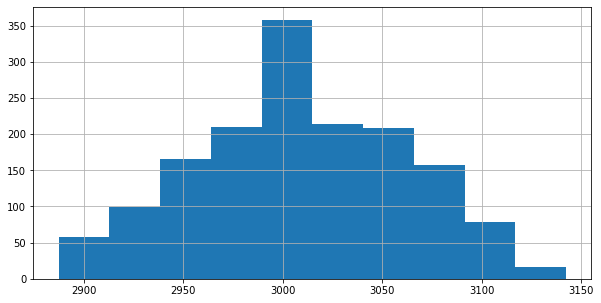

In [43]:
df_sensor_data["0"].hist(figsize=(10,5))

Here in above sensor 1 range of test is between 2900 -3150(sensor test range) where the distribution is nominal and peak value is around 3000. Now lets look at some more columns

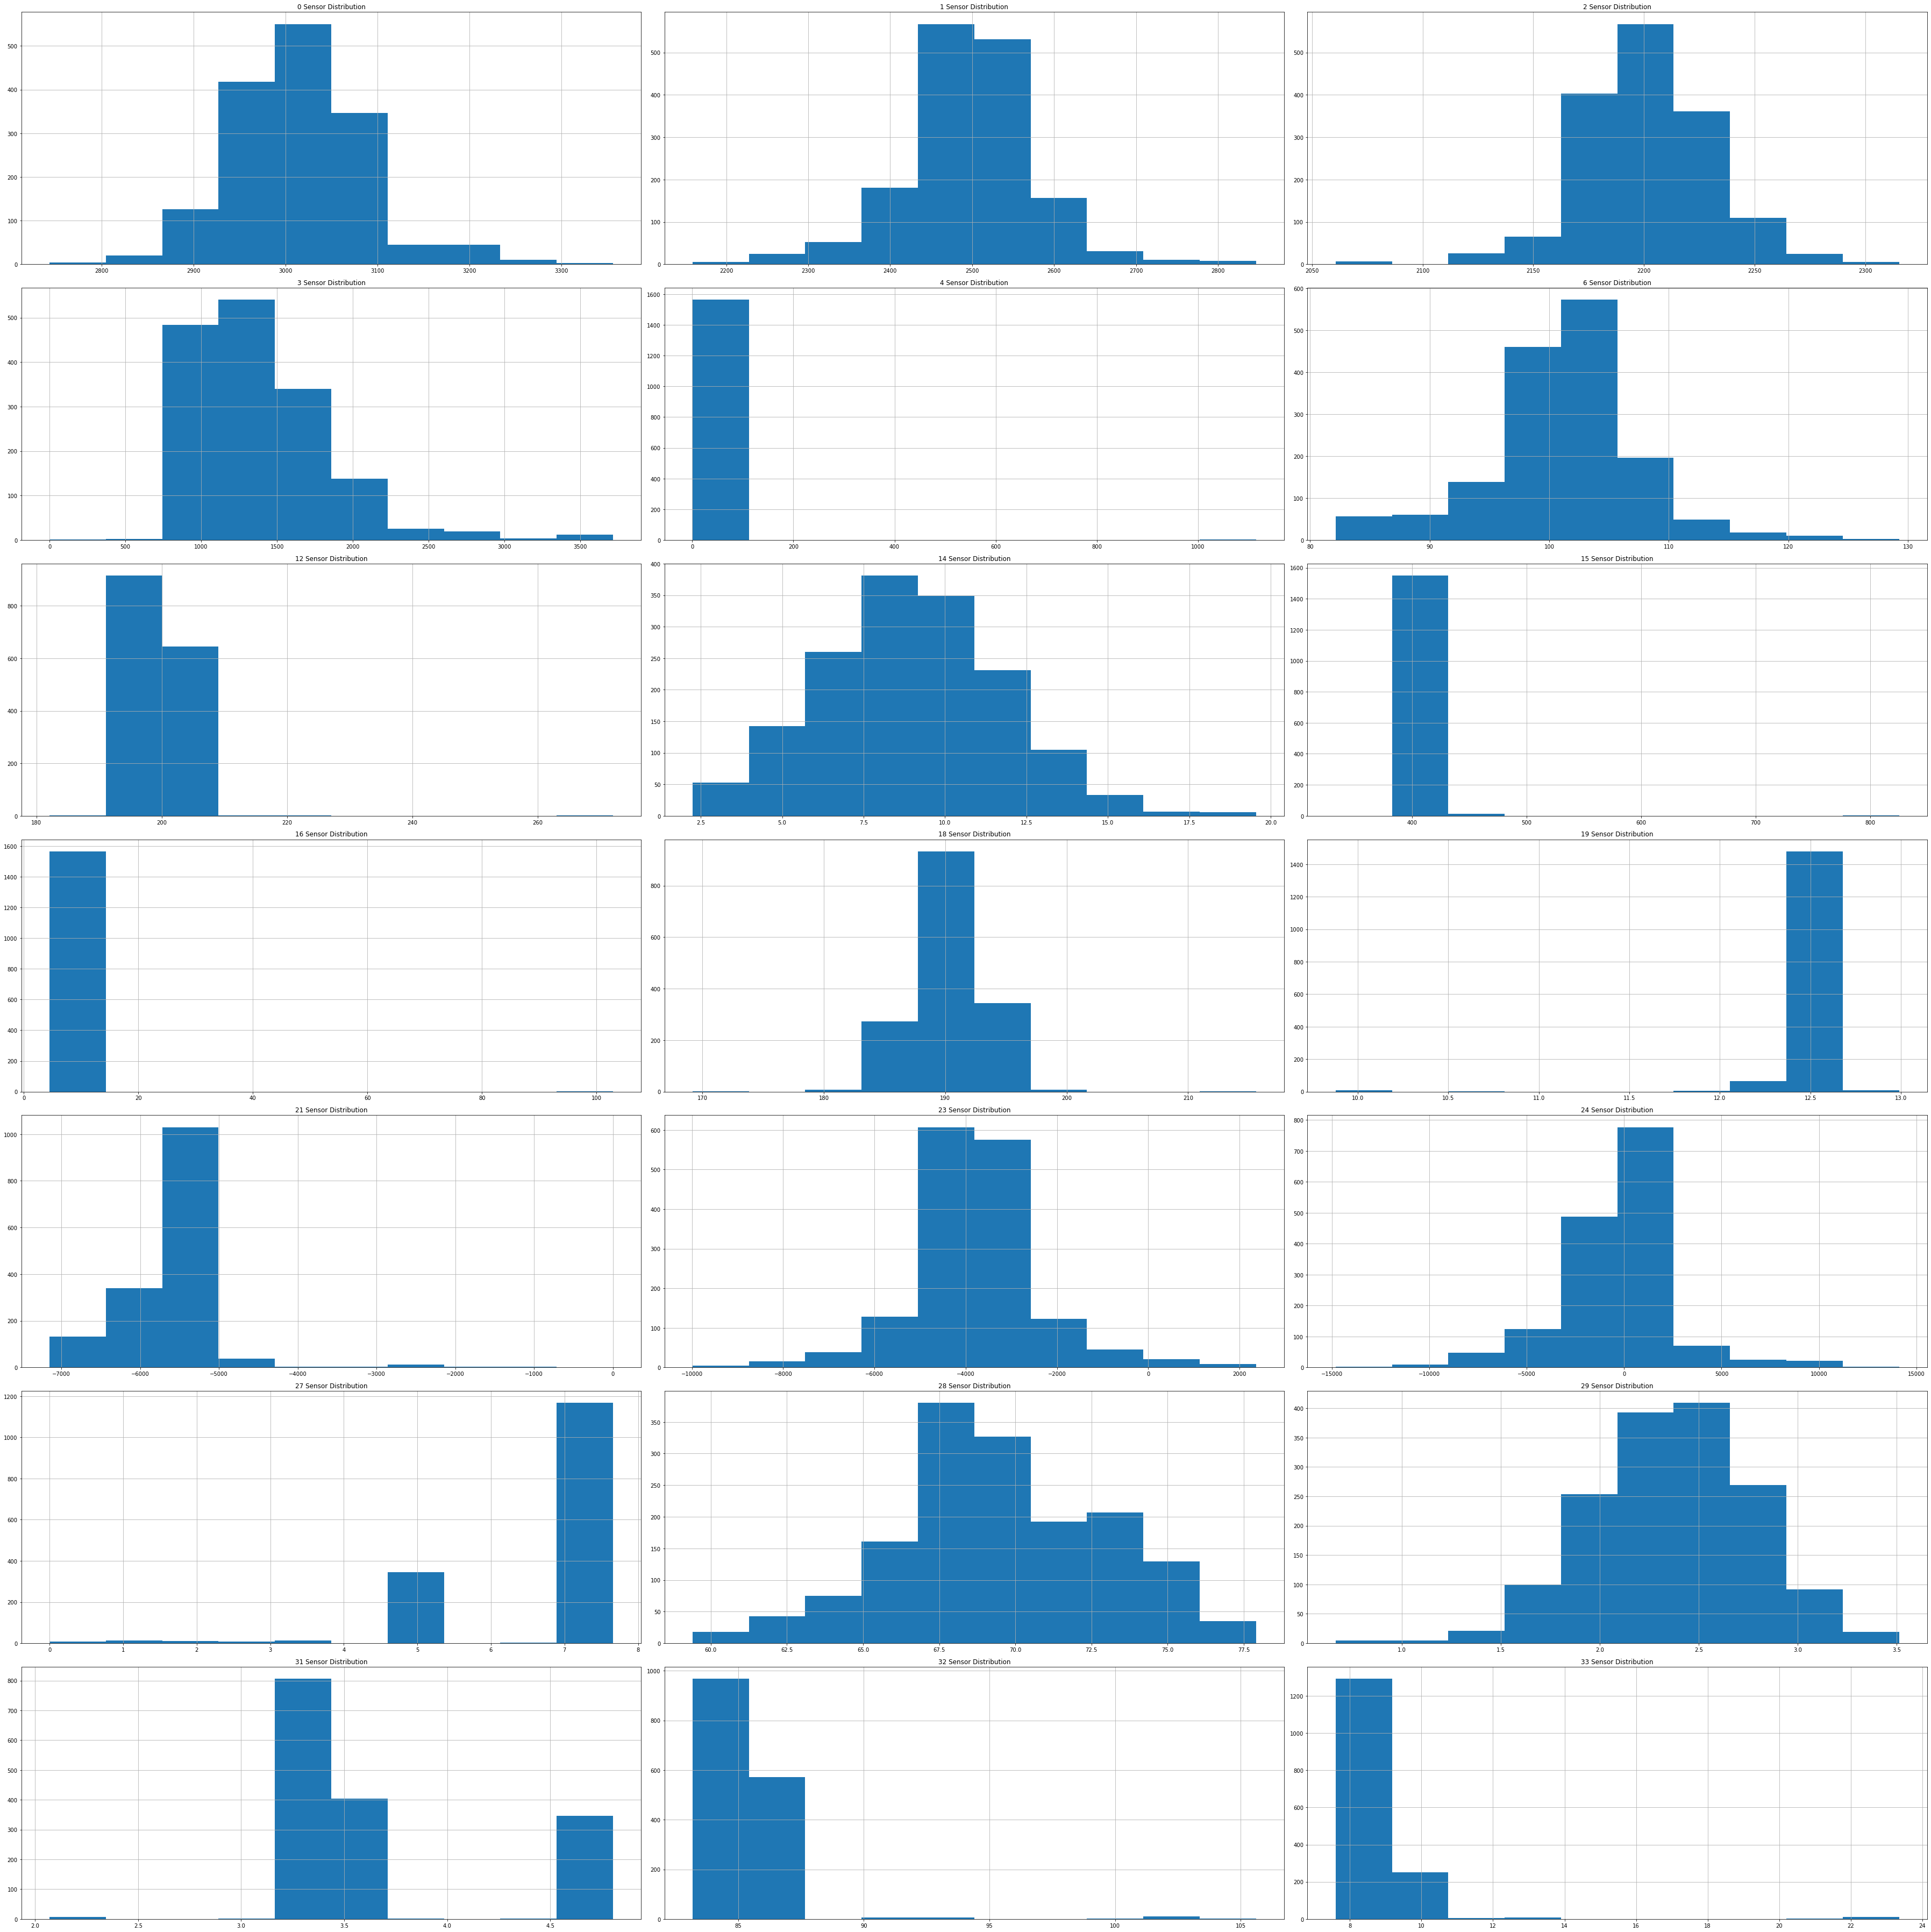

In [44]:
#Observation is that most of the variables distribution are right skewed with long tails and outliers 
#

def draw_histograms(df_sensor_data, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(50,50))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df_sensor_data[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Sensor Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


draw_histograms(df_sensor2, pd_data.iloc[:,0:21], 7, 3)

Here we can observe the distribution of sensors are varying between different range and so obviously Type of Curves are also varying. But some Sensitivity signals are under question as there are 2 -3 gaussians we can identlfy in some histogram distribution above. Now again that is due to Faulty specimen or Sensitivity of sensors based on the type we have to cross check it with domain expert.  

<AxesSubplot:xlabel='0'>

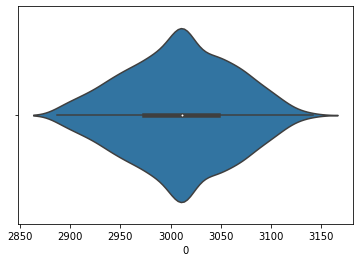

In [45]:
sns.violinplot (df_sensor_data["0"])

So here above in violinplot of sensor 1 we can analyze that 1 gaussian is there. And the range of sensor is between 2850-3150

<AxesSubplot:xlabel='12'>

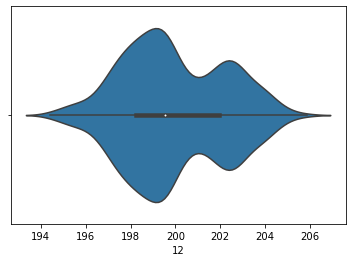

In [46]:
sns.violinplot (df_sensor_data["12"])

So here above in violinplot of sensor 13 we can analyze that 2 gaussian is there. And range of sensor is between 194 -206

<AxesSubplot:xlabel='571'>

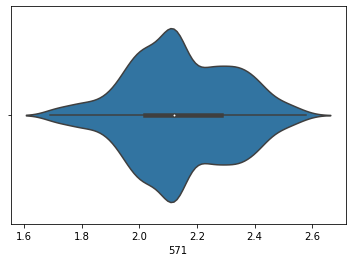

In [47]:
sns.violinplot (df_sensor_data["571"])

These senosor no 572 also has 2 Gaussians But note out the range of sensor just above 2 thresold. Remember we have eliminated the Low SD thresold sensors below 2. That means this test has very high resolution sensors based on microns. 

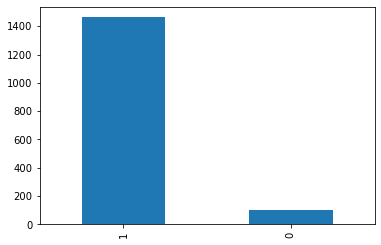

In [48]:
df_sensor_data["Pass/Fail"].value_counts().plot(kind="bar");

Target data is completely imbalanced. Need to balance it.

<AxesSubplot:ylabel='Pass/Fail'>

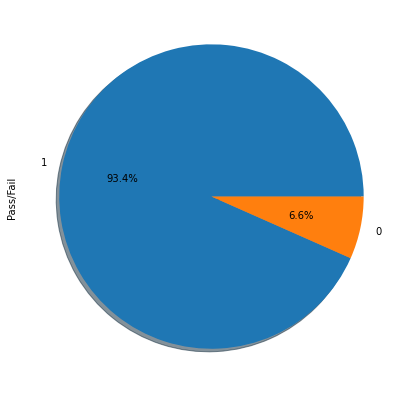

In [49]:
fig = plt.figure(figsize =(10, 7))
df_sensor_data["Pass/Fail"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

So as expected here Specimen Test Pass Category is above 1450 and fail category is below 100.  Pass category has 93.4% population in data and fail has 6.6% population in data. So for following data we can find the rejection rate of Test specimen. 

So overall we have different range of sensors with different gaussian distribution.

#### Q3 B - Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.

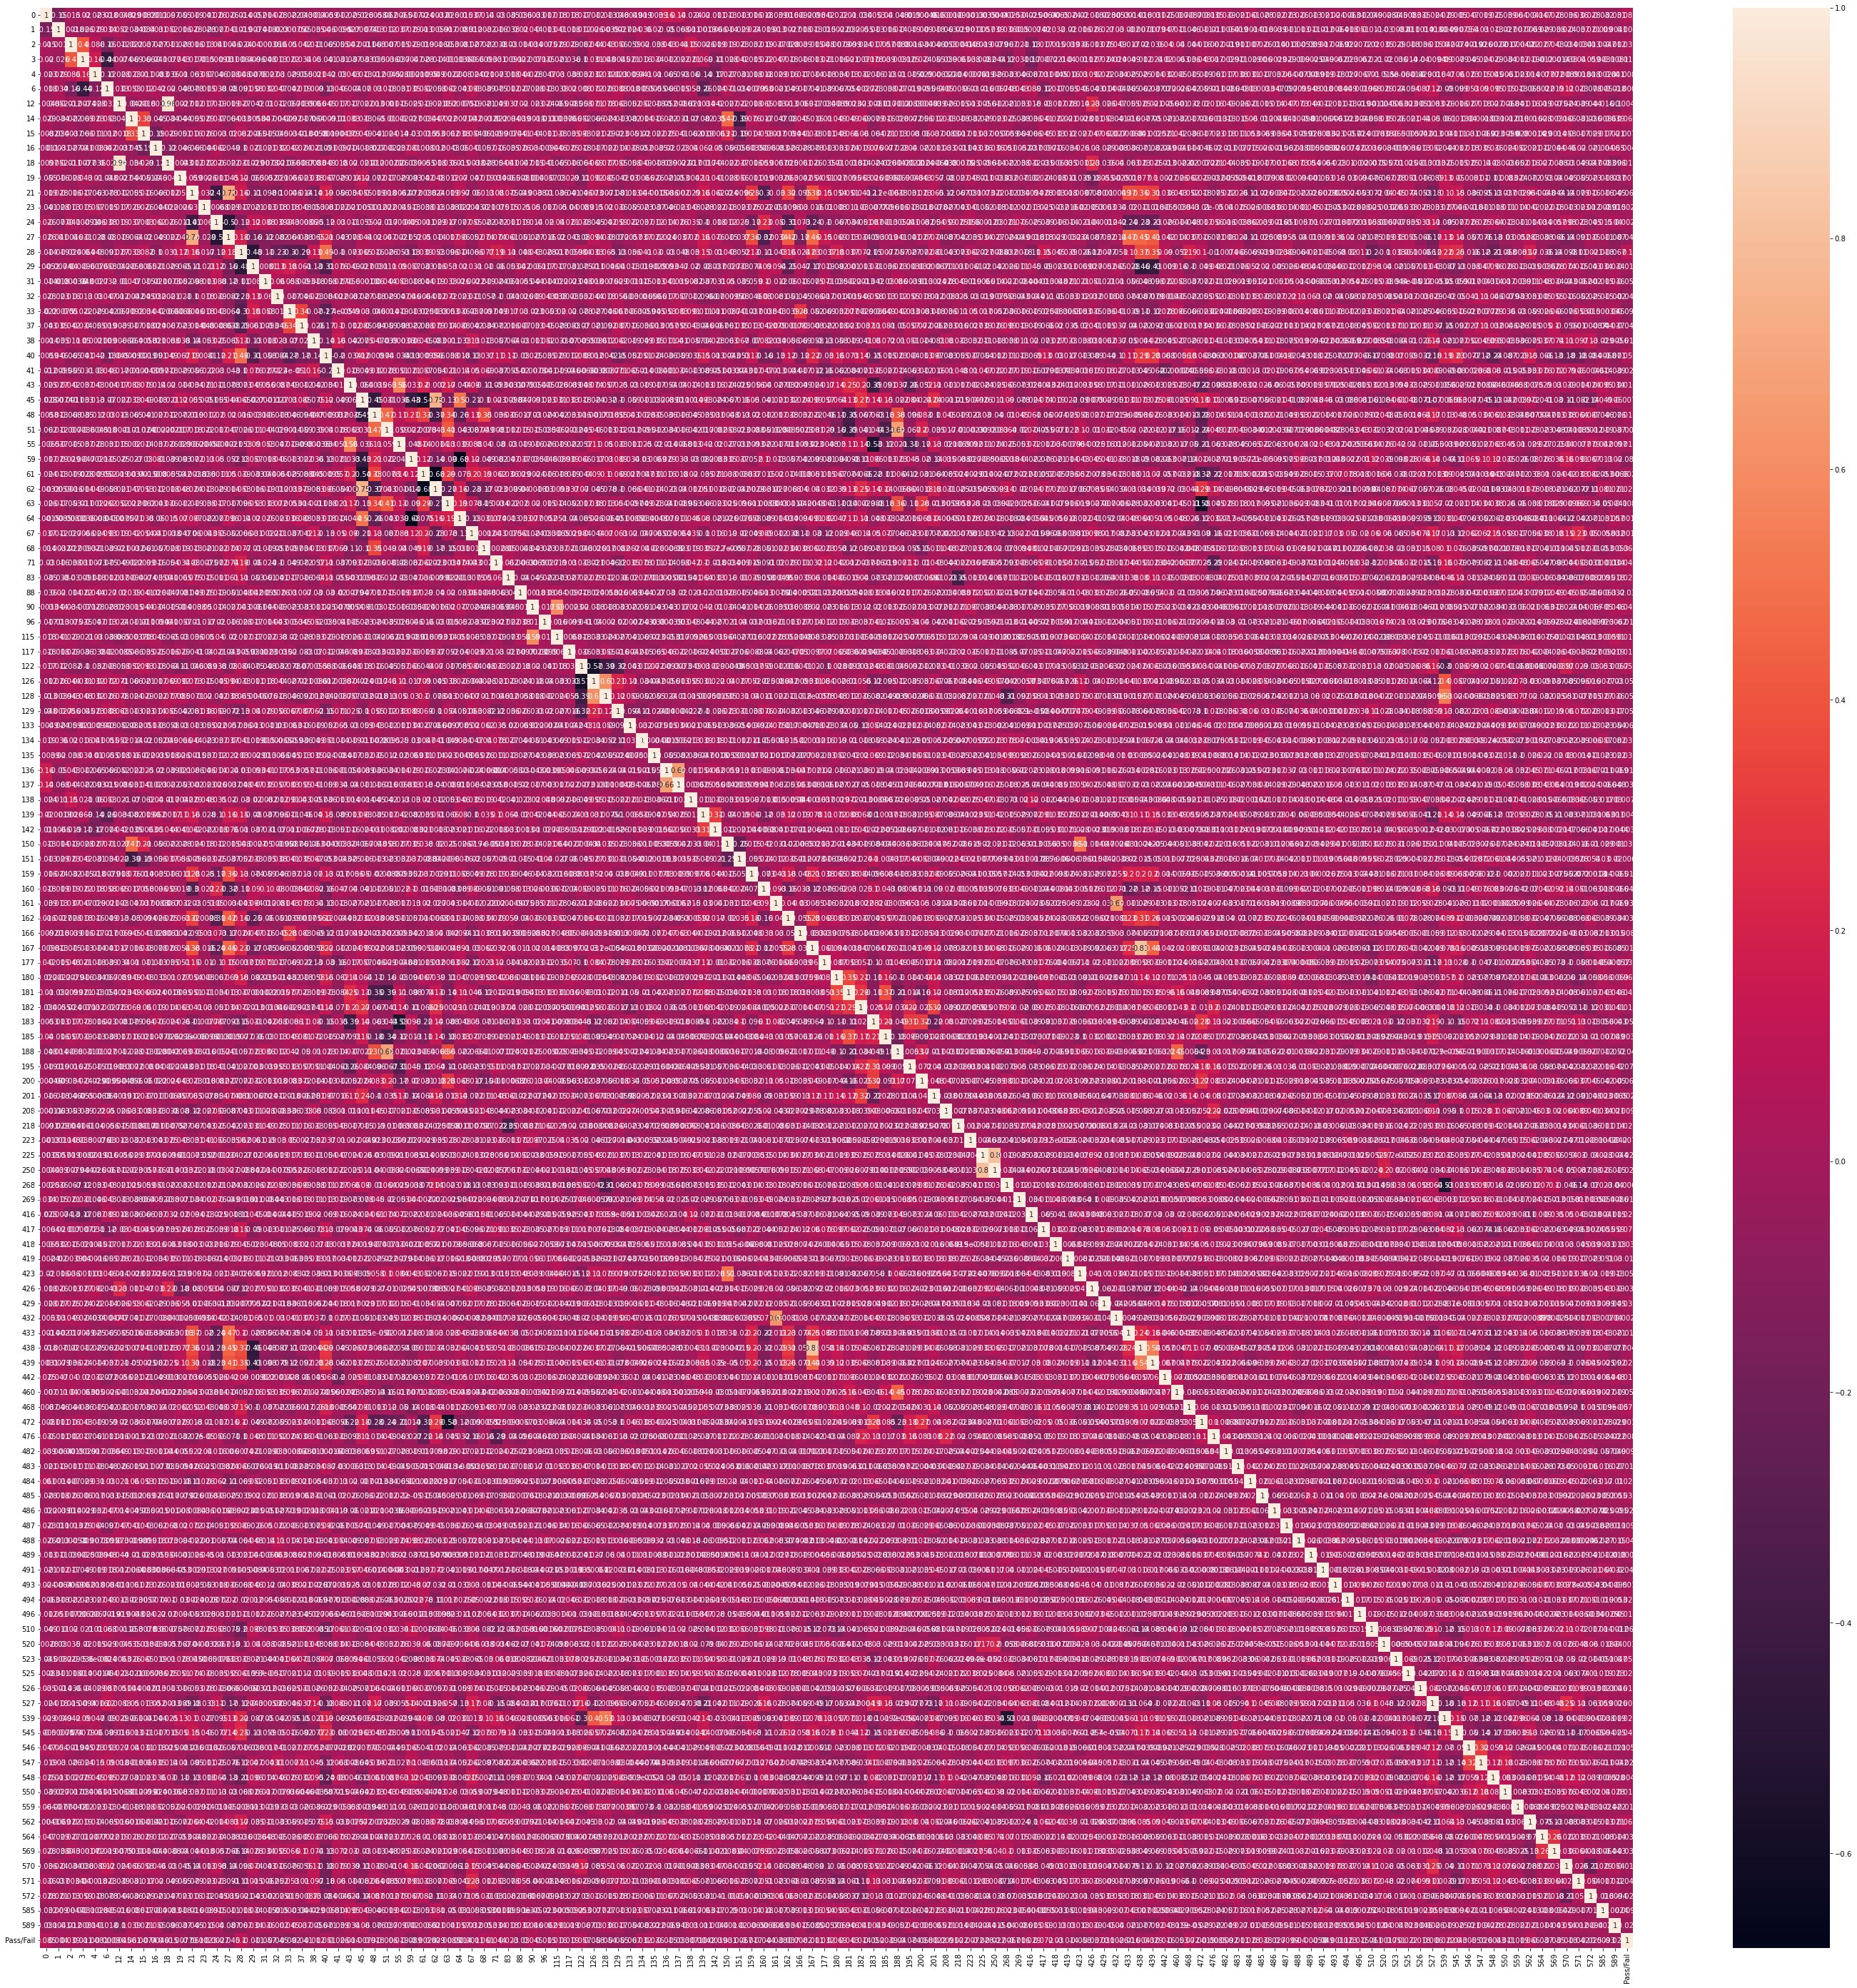

In [50]:
plt.figure(figsize=(50,50))
sns.heatmap(df_sensor_data.corr(), annot=True)  # heatmap
plt.show()

From above based on heat color index Very few data is highly co-related. Around 20-30 that can be our PCA components

<AxesSubplot:title={'center':'sensor 5'}, xlabel='4'>

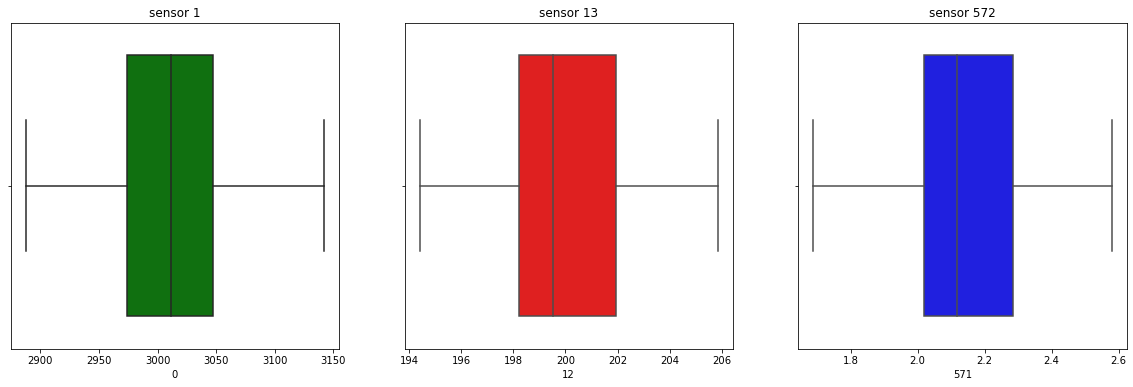

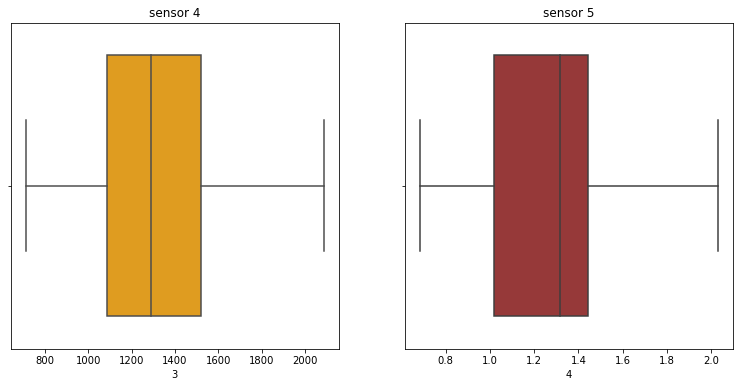

In [51]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('sensor 1')
sns.boxplot(df_sensor_data['0'],color='green')

plt.subplot(1, 3, 2)
plt.title('sensor 13')
sns.boxplot(df_sensor_data['12'],color='red')

plt.subplot(1, 3, 3)
plt.title('sensor 572')
sns.boxplot(df_sensor_data['571'],color='blue')

plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('sensor 4')
sns.boxplot(df_sensor_data['3'],color='orange')

plt.subplot(1, 3, 2)
plt.title('sensor 5')
sns.boxplot(df_sensor_data['4'],color='brown')


So here the range of sensors are different and have to scale it in future before training the data

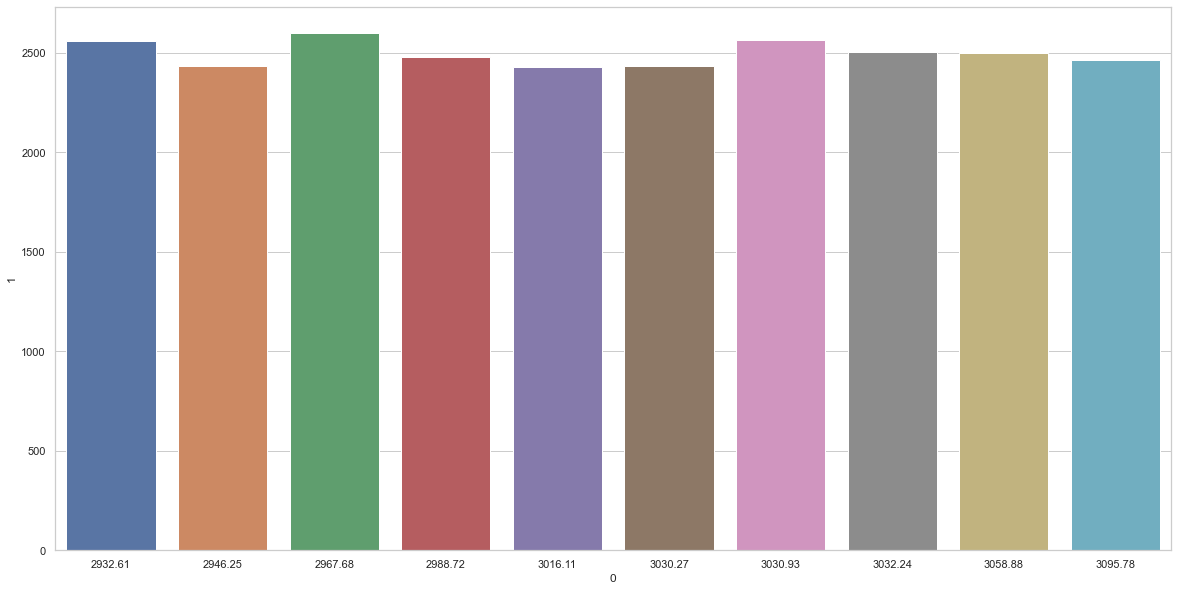

In [52]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.barplot(x="0", y="1", data= df_sensor_data.head(10))

Sensor 1 and 2 has almost Identical ranges and signals

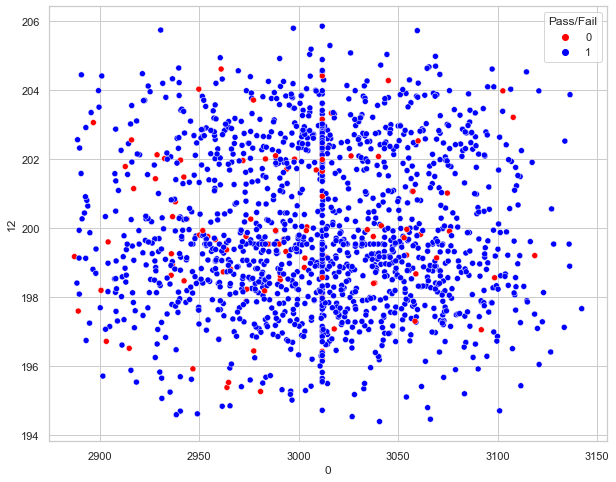

In [53]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="0", y="12", hue="Pass/Fail",
              data=df_sensor_data, 
                    palette=['red','blue']);

The population of Pass is more then fail that need to be sampled as this wont make any sense for future modelling

### 4. Data pre-processing:

#### Q4 A - Segregate predictors vs target attributes.

In [54]:
X= df_sensor_data.drop(["Pass/Fail"],axis=1)
y= df_sensor_data [["Pass/Fail"]]

In [55]:
X.shape

(1567, 130)

In [56]:
y.shape

(1567, 1)

In [57]:
X.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
570    float64
571    float64
572    float64
585    float64
589    float64
Length: 130, dtype: object

#### Q4 B - Check for target balancing and fix it if found imbalanced.

In [58]:
#!pip install --user -U imbalanced-learn

In [59]:
y.value_counts()

Pass/Fail
1            1463
0             104
dtype: int64

As discussed the failed testspecimen class is quite underbalanced then the pass class

In [60]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X,y)

In [61]:
X_train_res.shape

(2926, 130)

In [62]:
y_train_res.shape

(2926, 1)

In [63]:
y_train_res.value_counts()

Pass/Fail
0            1463
1            1463
dtype: int64

#### Q4 C - Perform train-test split and standardise the data or vice versa if required.

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.3,random_state= 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2048, 130)
(2048, 1)
(878, 130)
(878, 1)


In [65]:
y_test.value_counts()

Pass/Fail
1            449
0            429
dtype: int64

In [66]:
# standardization

from sklearn.preprocessing import StandardScaler


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

#### Q4 D - Check if the train and test data have similar statistical characteristics when compared with original data.

In [67]:
X.describe()

0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3009.520426  2498.851577  2200.644181  1320.134092     1.265198   
std      52.469192    50.573319    22.533720   301.033861     0.288276   
min    2887.330000  2374.500000  2146.111100   711.025800     0.681500   
25%    2973.525000  2465.665000  2183.538850  1084.377900     1.017700   
50%    3011.840000  2498.910000  2200.955600  1287.353800     1.317100   
75%    3047.125000  2531.295000  2216.477800  1518.290500     1.442550   
max    3142.210000  2623.100000  2254.866700  2086.471000     2.030000   

                 6           12           14           15           16  ...  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    101.552215   199.921126     8.951694   412.458149     9.865032  ...   
std       3.564189     2.302758     2.423175     8.113925     0.342067  ...   
min      92.370000   194.390900     3.544500   393.666800     9.083100  ...   
25%      99.258900   198.231800     7.287850   406.292050     9.631200  ...   
50%     101.492200   199.537100     8.973900   412.262900     9.852000  ...   
75%     104.023900   201.926100    10.650350   418.714800    10.068300  ...   
max     110.993300   205.856000    14.530200   431.695800    10.680000  ...   

               550          559          562          564          569  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean     16.794566     0.302960   263.981358     6.071156    19.053439   
std       2.052293     0.171595     1.114757     1.222561     4.129814   
min      12.060000     0.069900   259.932000     3.520000     9.854800   
25%      15.375000     0.149950   263.402000     4.980000    15.466200   
50%      17.013313     0.290900   264.272000     6.290000    20.182400   
75%      17.650000     0.408400   264.272000     6.444985    21.117674   
max      21.990000     0.732900   267.340000     9.630000    30.602700   

               570          571          572          585         589  
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.00000  
mean    532.660417     2.144182     8.601365     2.751771    72.10830  
std       2.139965     0.180147     1.540714     0.576408    34.87468  
min     527.699100     1.688700     5.390000     1.515200    10.94250  
25%     531.186800     2.019150     7.560000     2.320750    46.26210  
50%     532.398200     2.118600     8.650000     2.757700    72.02300  
75%     534.145900     2.283600     9.660000     3.107000    84.38955  
max     538.000000     2.579800    12.700000     4.282200   184.87030  

[8 rows x 130 columns]

In [68]:
X_train_res.describe()

0            1            2            3            4  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000   
mean   2999.709181  2498.263286  2198.808852  1309.949740     1.269781   
std      49.202875    45.533048    20.923141   269.352618     0.264074   
min    2887.330000  2374.500000  2146.111100   711.025800     0.681500   
25%    2964.194847  2470.216203  2182.944647  1091.602732     1.070000   
50%    2999.898533  2498.910000  2198.997585  1284.124587     1.306358   
75%    3032.814050  2525.735672  2212.866700  1502.849225     1.438818   
max    3142.210000  2623.100000  2254.866700  2086.471000     2.030000   

                 6           12           14           15           16  ...  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000  ...   
mean    101.594344   199.878340     8.712446   412.718129     9.869345  ...   
std       3.320817     2.080808     2.352091     7.317524     0.305828  ...   
min      92.370000   194.390900     3.544500   393.666800     9.083100  ...   
25%      99.459787   198.475056     6.953134   407.671597     9.682775  ...   
50%     101.492200   199.660900     8.762021   412.401250     9.854431  ...   
75%     103.880000   201.433765    10.399286   418.031967    10.049607  ...   
max     110.993300   205.856000    14.530200   431.695800    10.680000  ...   

               550          559          562          564          569  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000   
mean     16.763547     0.311895   263.823736     6.183328    19.377765   
std       1.834625     0.158069     1.088855     1.096855     3.794810   
min      12.060000     0.069900   259.932000     3.520000     9.854800   
25%      15.614887     0.173627   262.939125     5.164903    15.677586   
50%      17.000409     0.293041   264.272000     6.290000    20.182400   
75%      17.464675     0.410799   264.272000     6.444985    21.117674   
max      21.990000     0.732900   267.340000     9.630000    30.602700   

               570          571          572          585          589  
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000  
mean    532.752637     2.157318     8.658571     2.761306    73.683323  
std       1.998036     0.177293     1.444183     0.536255    31.917717  
min     527.699100     1.688700     5.390000     1.515200    10.942500  
25%     531.407300     2.034298     7.740000     2.358315    52.188082  
50%     532.416717     2.146543     8.650000     2.756357    72.023000  
75%     534.123912     2.290900     9.600427     3.121600    85.291095  
max     538.000000     2.579800    12.700000     4.282200   184.870300  

[8 rows x 130 columns]

In [69]:
X_test.describe()

0            1            2            3           4  \
count   878.000000   878.000000   878.000000   878.000000  878.000000   
mean   2996.254339  2499.363864  2198.376267  1319.416048    1.266535   
std      48.414332    45.079470    21.000685   261.906999    0.262192   
min    2887.788249  2377.890000  2146.855500   711.025800    0.721700   
25%    2961.576135  2474.885000  2181.810460  1110.095232    1.066452   
50%    2997.199178  2498.910000  2198.528485  1287.353800    1.298100   
75%    3029.846933  2526.095672  2212.455445  1502.922100    1.450361   
max    3123.020000  2622.600000  2251.624360  2086.471000    2.021800   

                6          12          14          15          16  ...  \
count  878.000000  878.000000  878.000000  878.000000  878.000000  ...   
mean   101.298932  199.871028    8.718643  412.761313    9.877265  ...   
std      3.309911    2.101520    2.316321    7.489869    0.313005  ...   
min     92.370000  194.533700    3.574900  393.666800    9.083100  ...   
25%     99.146087  198.399323    7.070971  407.743353    9.684143  ...   
50%    101.492200  199.638850    8.828650  412.262900    9.864536  ...   
75%    103.443698  201.462495   10.376987  418.279165   10.064551  ...   
max    110.542200  205.727100   14.422700  431.236100   10.680000  ...   

              550         559         562         564         569         570  \
count  878.000000  878.000000  878.000000  878.000000  878.000000  878.000000   
mean    16.812782    0.319120  263.870398    6.118762   19.294146  532.814692   
std      1.887948    0.158897    1.105526    1.103564    3.949418    2.036349   
min     12.060000    0.069900  259.954000    3.570000    9.854800  527.699100   
25%     15.644737    0.182989  263.050396    4.983179   15.466200  531.447163   
50%     17.013313    0.297996  264.272000    6.290000   20.182400  532.432680   
75%     17.560000    0.420780  264.272000    6.444985   21.117674  534.153375   
max     21.950000    0.732900  267.340000    9.540000   30.598700  537.941800   

              571         572         585         589  
count  878.000000  878.000000  878.000000  878.000000  
mean     2.153256    8.621693    2.762538   71.872742  
std      0.180076    1.440655    0.538525   32.544153  
min      1.688700    5.390000    1.529600   15.344400  
25%      2.027653    7.704296    2.352238   50.117984  
50%      2.142550    8.650000    2.754612   71.660654  
75%      2.291136    9.541173    3.148775   82.930444  
max      2.567200   12.700000    4.252200  183.392800  

[8 rows x 130 columns]

Comparing SD,min, median and max . Train and test data has almost similar characteristic like original data set

### 5. Model training, testing and tuning:

#### Q5 A - Use any Supervised Learning technique to train a model.

In [70]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression (random_state=42)

logreg.fit(X_train_scaled, y_train)

pred = logreg.predict(X_test_scaled)

print("Logreg Training Accuracy :", logreg.score(X_train_scaled, y_train))
print("Logreg Testing Accuracy :", logreg.score(X_test_scaled, y_test))

Logreg Training Accuracy : 0.83251953125
Logreg Testing Accuracy : 0.7881548974943052


#### Q5 B - Use cross validation techniques.
Hint: Use all CV techniques that you have learnt in the course.

#### K-FOLD CROSS VALIDATION

In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 20


kfold = KFold(n_splits=num_folds)
results = cross_val_score(logreg, X_train_scaled, y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.77669903 0.78640777 0.7961165  0.77669903 0.80582524 0.75728155
 0.88349515 0.80582524 0.7745098  0.84313725 0.81372549 0.7745098
 0.76470588 0.79411765 0.83333333 0.7745098  0.7745098  0.84313725
 0.75490196 0.84313725]
Accuracy: 79.883% (3.385%)


#### Stratified K-FOLD Cross Validation

In [72]:
k = 20
from sklearn.model_selection  import StratifiedKFold, cross_val_score
stratified_kfold = StratifiedKFold(n_splits = k)
results = cross_val_score(logreg, X_train_scaled, y_train, cv = stratified_kfold)

print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score
Avearge:  0.7983580810965164
Standard deviation:  0.030634405819557252


#### Leave One Out Cross-Validation

In [73]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

# You Will do it on X_train, y_train to save time. It will take too much time, hence not recommended for bigger data
scores = cross_val_score(logreg, X_train_scaled, y_train, cv=LeaveOneOut())


print(scores)
print('Avearge: ', scores.mean())
print('Standard deviation: ', scores.std())


[0. 1. 1. ... 1. 0. 1.]
Avearge:  0.80029296875
Standard deviation:  0.3997801057072644


#### Bootstrapping

In [74]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train_scaled, y_train)
    logreg.fit(X_, y_)
    y_pred = logreg.predict(X_test_scaled)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)
    
accuracy = np.array(accuracy)
print("Accuracy Score")
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7824601366742596
Standard deviation:  0.01425283846101199


Here every CV FOLD Technique is showing high accuracies but LOOCV is showin 80% accuracy . Its time consuming though and not recommended for big data.

#### Q5 C - Apply hyper-parameter tuning techniques to get the best accuracy.
Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.

In [75]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression (random_state=42)

logreg.fit(X_train_scaled, y_train)

pred = logreg.predict(X_test_scaled)

print("Logreg Training Accuracy :", logreg.score(X_train_scaled, y_train))
print("Logreg Testing Accuracy :", logreg.score(X_test_scaled, y_test))

Logreg Training Accuracy : 0.83251953125
Logreg Testing Accuracy : 0.7881548974943052


In [76]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV


param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg_cv=GridSearchCV(logreg,param_grid,cv=10)

logreg_cv.fit(X_train_scaled,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}


In [77]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression (C=10,penalty= "l2",random_state=42)

logreg.fit(X_train_scaled, y_train)

pred = logreg.predict(X_test_scaled)

print("Logreg Training Accuracy :", logreg.score(X_train_scaled, y_train))
print("Logreg Testing Accuracy :", logreg.score(X_test_scaled, y_test))

Logreg Training Accuracy : 0.833984375
Logreg Testing Accuracy : 0.7904328018223234


Here Tuned performance has sighlty increased for logistic Regression and its 79.04%

#### Q5 D - Use any other technique/method which can enhance the model performance.
Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.

NOW Lets do some PCA transformation to see further we can boost the models performance or not

In [78]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_train_scaled)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform (X_test_scaled)
display(X_train_reduced.shape, X_test_reduced.shape)

(2048, 130)

(878, 130)

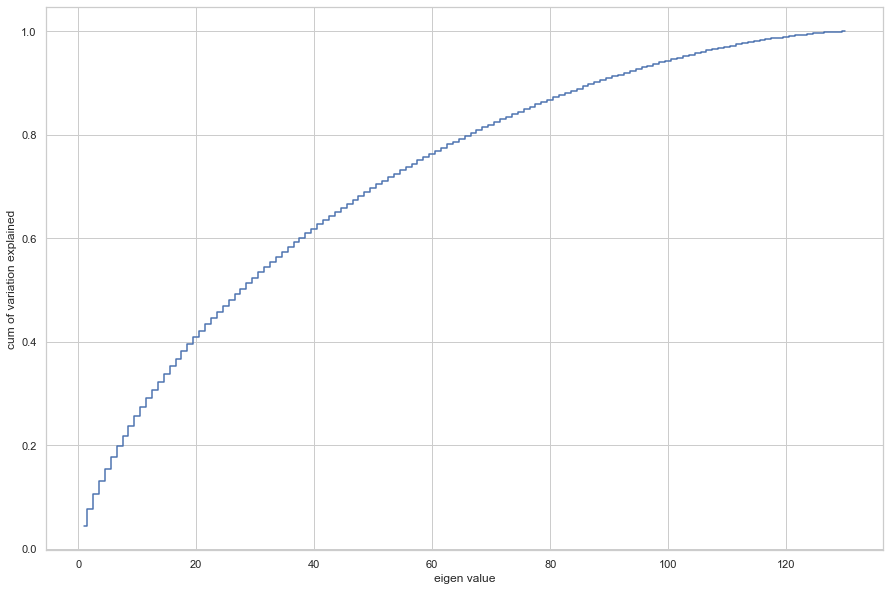

In [79]:
plt.figure(figsize=(15,10))
plt.step(list(range(1,131)),np.cumsum(pca.explained_variance_ratio_),where='mid')

plt.xlabel('eigen value')
plt.ylabel ('cum of variation explained')
plt.show()

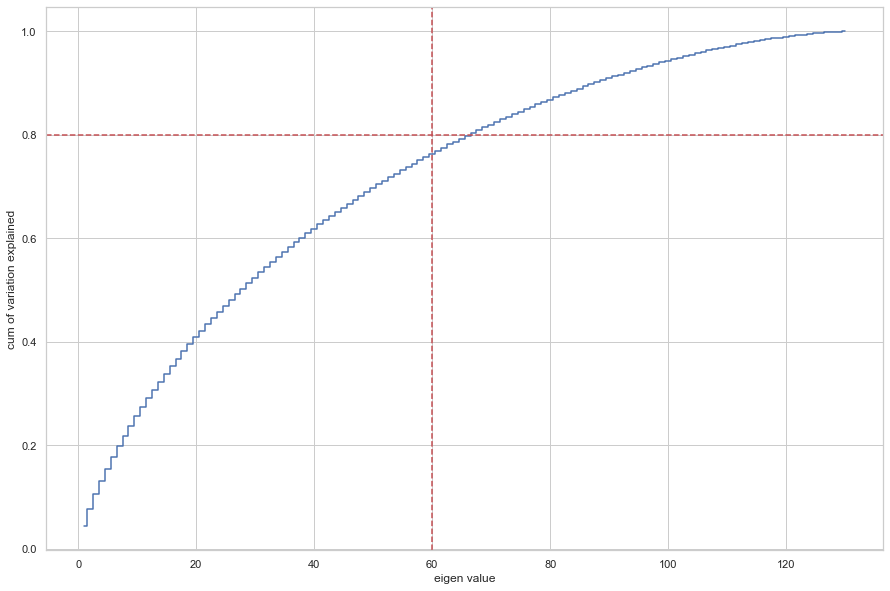

In [80]:
plt.figure(figsize=(15,10))
plt.step(list(range(1,131)),np.cumsum(pca.explained_variance_ratio_),where='mid')

plt.xlabel('eigen value')
plt.ylabel ('cum of variation explained')

plt.axhline(y= 0.80, color= 'r', linestyle = '--')
plt.axvline(x=60, color = 'r', linestyle= '--')
plt.show()

In [81]:
pca=PCA(n_components=60, random_state=42)
pca.fit(X_train_scaled)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform (X_test_scaled)
display(X_train_reduced.shape, X_test_reduced.shape)

(2048, 60)

(878, 60)

In [82]:
#Cross Valdation for PCA 

param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg_cv=GridSearchCV(logreg,param_grid,cv=10)

logreg_cv.fit(X_train_reduced,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)


tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}


In [83]:
logreg = LogisticRegression (C=10.01,penalty= "l2",random_state=42)

logreg.fit(X_train_reduced, y_train)

pred = logreg.predict(X_test_reduced)

print("Logreg Training Accuracy :", logreg.score(X_train_reduced, y_train))
print("Logreg Testing Accuracy :", logreg.score(X_test_reduced, y_test))

Logreg Training Accuracy : 0.7763671875
Logreg Testing Accuracy : 0.7369020501138952


#### Q5 E - Display and explain the classification report in detail.

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       429
           1       0.76      0.70      0.73       449

    accuracy                           0.74       878
   macro avg       0.74      0.74      0.74       878
weighted avg       0.74      0.74      0.74       878



Here check the classification report where precision and recall both are near to 74%. Its acceptable. There in no imbalance between both so our Type-I error and Type-II error both are under control.  Until we need that either of the precission./recall should reach 90%. But this totally depends on the faulty rate. Generally after production we do this types of testing and our rejection/failure rate is fixed. 
For ex- in this case i can say that i need above 80% quality assurance of manufacturing accuracy. 

But sometimes if we buy new manufacturing machines then we expect the recall above 90%.

Also after PCA accuracy is quite dropped because we have lost some information but the cost of computing is also reduced. 

#### Q5 F - Apply the above steps for all possible models that you have learnt so far.

In [85]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import RepeatedKFold, train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import  KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.svm import OneClassSVM


In [86]:
logreg = LogisticRegression(solver='liblinear', random_state=42)

logreg.fit(X_train_reduced, y_train)

pred = logreg.predict(X_test_reduced)
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()

lr_train_score = logreg.score (X_train_reduced,y_train)
lr_test_score = logreg.score(X_test_reduced, y_test)
lr_recall = round(tp/(tp+fn), 3)  
lr_precision = round(tp/(tp+fp), 3)  
lr_specificity =round(tn/(tn+fp),3)   

result = pd.DataFrame({'Model' : ['Logistic Regression'], 'Train Accuracy' : [lr_train_score], 'Test Accuracy' : [lr_test_score],'Precision' : [lr_precision],
                      'True positive rate' : [lr_recall], 'True negative rate' : [lr_specificity],
                       'False positive rate' :  [1-lr_specificity]})
result

Model  Train Accuracy  Test Accuracy  Precision  \
0  Logistic Regression        0.776855       0.736902      0.765   

   True positive rate  True negative rate  False positive rate  
0               0.702               0.774                0.226

In [87]:
#already we have this tuned parameters so no need to do re grid search posting it at is for gettting it in the list
logreg = LogisticRegression (C=10.01,penalty= "l2",random_state=42)

logreg.fit(X_train_reduced, y_train)

pred = logreg.predict(X_test_reduced)
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()

lr_train_score= logreg.score(X_train_reduced, y_train)
lr_test_score = logreg.score(X_test_reduced, y_test)
lr_recall = round(tp/(tp+fn), 3)  
lr_precision = round(tp/(tp+fp), 3)  
lr_specificity =round(tn/(tn+fp),3) 

result.loc[1] = ['Logistic Regression Tuned', lr_train_score, lr_train_score, lr_test_score, lr_recall, lr_specificity, 1-lr_specificity]
result

Model  Train Accuracy  Test Accuracy  Precision  \
0        Logistic Regression        0.776855       0.736902   0.765000   
1  Logistic Regression Tuned        0.776367       0.776367   0.736902   

   True positive rate  True negative rate  False positive rate  
0               0.702               0.774                0.226  
1               0.702               0.774                0.226

In [88]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train_reduced, y_train)

pred = dt.predict(X_test_reduced)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

dt_train_score = dt.score(X_train_reduced,y_train)
dt_test_score = dt.score(X_test_reduced, y_test)
dt_recall = round(tp/(tp+fn), 3)   
dt_precision = round(tp/(tp+fp), 3) 
dt_specificity =round(tn/(tn+fp),3)   

result.loc[2] = ['Decision Tree', dt_train_score, dt_test_score, dt_precision, dt_recall, dt_specificity, 1-dt_specificity]
result

Model  Train Accuracy  Test Accuracy  Precision  \
0        Logistic Regression        0.776855       0.736902   0.765000   
1  Logistic Regression Tuned        0.776367       0.776367   0.736902   
2              Decision Tree        1.000000       0.873576   0.912000   

   True positive rate  True negative rate  False positive rate  
0               0.702               0.774                0.226  
1               0.702               0.774                0.226  
2               0.833               0.916                0.084

In [89]:
# Create the parameter grid based on the results of random search 

params = {'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train_reduced, y_train)
grid_search.best_params_

Fitting 4 folds for each of 50 candidates, totalling 200 fits


{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

In [90]:
# Lets change the max depth

dt = DecisionTreeClassifier(max_depth= 20, min_samples_leaf=5, criterion="entropy", random_state=42)

dt.fit(X_train_reduced, y_train)

pred = dt.predict(X_test_reduced)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

dt_train_score= dt.score(X_train_reduced,y_train)
dt_test_score = dt.score(X_test_reduced, y_test)
dt_recall = round(tp/(tp+fn), 3)   
dt_precision = round(tp/(tp+fp), 3)  
dt_specificity =round(tn/(tn+fp),3)    

result.loc[3] = ['Decision Tree Tuned', dt_train_score, dt_test_score, dt_precision, dt_recall, dt_specificity, 1-dt_specificity]
result

Model  Train Accuracy  Test Accuracy  Precision  \
0        Logistic Regression        0.776855       0.736902   0.765000   
1  Logistic Regression Tuned        0.776367       0.776367   0.736902   
2              Decision Tree        1.000000       0.873576   0.912000   
3        Decision Tree Tuned        0.969727       0.864465   0.921000   

   True positive rate  True negative rate  False positive rate  
0               0.702               0.774                0.226  
1               0.702               0.774                0.226  
2               0.833               0.916                0.084  
3               0.804               0.928                0.072

In [91]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_reduced, y_train)

pred = rf.predict(X_test_reduced)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

rf_train_score= rf.score(X_train_reduced, y_train)
rf_test_score = rf.score(X_test_reduced, y_test)
rf_recall = round(tp/(tp+fn), 3)   
rf_precision = round(tp/(tp+fp), 3)  
rf_specificity =round(tn/(tn+fp),3) 

result.loc[4] = ['Random Forest',rf_train_score, rf_test_score, rf_precision, rf_recall, rf_specificity, 1 - rf_specificity]
result

Model  Train Accuracy  Test Accuracy  Precision  \
0        Logistic Regression        0.776855       0.736902   0.765000   
1  Logistic Regression Tuned        0.776367       0.776367   0.736902   
2              Decision Tree        1.000000       0.873576   0.912000   
3        Decision Tree Tuned        0.969727       0.864465   0.921000   
4              Random Forest        1.000000       0.974943   0.976000   

   True positive rate  True negative rate  False positive rate  
0               0.702               0.774                0.226  
1               0.702               0.774                0.226  
2               0.833               0.916                0.084  
3               0.804               0.928                0.072  
4               0.976               0.974                0.026

In [92]:
forest = RandomForestClassifier( bootstrap = True,
  max_depth = 40,
  max_features =  'auto' ,
  min_samples_leaf = 1,
  min_samples_split = 2,
  n_estimators = 600, random_state= 42)

forest.fit(X_train_reduced, y_train)

pred = forest.predict(X_test_reduced)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

forest_train_score= forest.score(X_train_reduced, y_train)
forest_test_score = forest.score(X_test_reduced, y_test)
forest_recall = round(tp/(tp+fn), 3)   
forest_precision = round(tp/(tp+fp), 3)  
forest_specificity =round(tn/(tn+fp),3) 

result.loc[5] = ['Random forest(tuned)', forest_train_score, forest_test_score, forest_precision, forest_recall, forest_specificity, 1 - forest_specificity]
result

Model  Train Accuracy  Test Accuracy  Precision  \
0        Logistic Regression        0.776855       0.736902   0.765000   
1  Logistic Regression Tuned        0.776367       0.776367   0.736902   
2              Decision Tree        1.000000       0.873576   0.912000   
3        Decision Tree Tuned        0.969727       0.864465   0.921000   
4              Random Forest        1.000000       0.974943   0.976000   
5       Random forest(tuned)        1.000000       0.977221   0.978000   

   True positive rate  True negative rate  False positive rate  
0               0.702               0.774                0.226  
1               0.702               0.774                0.226  
2               0.833               0.916                0.084  
3               0.804               0.928                0.072  
4               0.976               0.974                0.026  
5               0.978               0.977                0.023

In [93]:
from sklearn.svm import SVC

svm = SVC(C=1, gamma=1, kernel='rbf')

svm.fit(X_train_reduced, y_train)

pred = svm.predict(X_test_reduced)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

svm_train_score = svm.score (X_train_reduced,y_train)
svm_test_score = svm.score(X_test_reduced, y_test)
svm_recall = round(tp/(tp+fn), 3)   
svm_precision = round(tp/(tp+fp), 3)  
svm_specificity =round(tn/(tn+fp),3) 

result.loc[6] = ['SVM',svm_train_score, svm_test_score, svm_precision, svm_recall, svm_specificity, 1 - svm_specificity]
result

Model  Train Accuracy  Test Accuracy  Precision  \
0        Logistic Regression        0.776855       0.736902   0.765000   
1  Logistic Regression Tuned        0.776367       0.776367   0.736902   
2              Decision Tree        1.000000       0.873576   0.912000   
3        Decision Tree Tuned        0.969727       0.864465   0.921000   
4              Random Forest        1.000000       0.974943   0.976000   
5       Random forest(tuned)        1.000000       0.977221   0.978000   
6                        SVM        1.000000       0.760820   0.681000   

   True positive rate  True negative rate  False positive rate  
0               0.702               0.774                0.226  
1               0.702               0.774                0.226  
2               0.833               0.916                0.084  
3               0.804               0.928                0.072  
4               0.976               0.974                0.026  
5               0.978               0.977                0.023  
6               1.000               0.510                0.490

In [94]:
# Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3)


# fitting the model for grid search
grid.fit(X_train_reduced, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.505 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.505 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.506 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.837 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.751 total time=   0.3s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.724 total time=   0.3s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.738 total time=   0.3s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.770 total time=   0.3s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.937 total time=   0.3s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.937 total time=   0.3s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.917 total time=   0.3s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.944 total time=   0.3s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.934 total time=   0.3s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.980 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.993 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.995 total time=   0.1s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(C=1, gamma=1),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [95]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


### 6. Post Training and Conclusion:

#### Q6 A- Display and compare all the models designed with their train and test accuracies.

#### Q6 B - Select the final best trained model along with your detailed comments for selecting this model.

In [96]:
from sklearn.svm import SVC

SVC_model_Hyper  = SVC( C = 10, gamma = 0.0001, kernel = 'rbf',random_state=42)

SVC_model_Hyper.fit(X_train_reduced, y_train)

y_pred = SVC_model_Hyper.predict(X_test_reduced)

tn, fp, fn, tp = confusion_matrix (y_test, y_pred).ravel()

svc_tuned_train = SVC_model_Hyper.score(X_train_reduced, y_train)
svc_tuned_test= SVC_model_Hyper.score(X_test_reduced, y_test)
svc_recall = round(tp/(tp+fn), 3)   
svc_precision = round(tp/(tp+fp), 3)  
svc_specificity =round(tn/(tn+fp),3) 

result.loc[7] = ['SVMC Tuned',svc_tuned_train, svc_tuned_test, svc_precision, svc_recall, svc_specificity, 1 - svc_specificity]
result

Model  Train Accuracy  Test Accuracy  Precision  \
0        Logistic Regression        0.776855       0.736902   0.765000   
1  Logistic Regression Tuned        0.776367       0.776367   0.736902   
2              Decision Tree        1.000000       0.873576   0.912000   
3        Decision Tree Tuned        0.969727       0.864465   0.921000   
4              Random Forest        1.000000       0.974943   0.976000   
5       Random forest(tuned)        1.000000       0.977221   0.978000   
6                        SVM        1.000000       0.760820   0.681000   
7                 SVMC Tuned        0.782227       0.740319   0.783000   

   True positive rate  True negative rate  False positive rate  
0               0.702               0.774                0.226  
1               0.702               0.774                0.226  
2               0.833               0.916                0.084  
3               0.804               0.928                0.072  
4               0.976               0.974                0.026  
5               0.978               0.977                0.023  
6               1.000               0.510                0.490  
7               0.682               0.802                0.198

In [97]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_reduced, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test_reduced)
 
tn, fp, fn, tp = confusion_matrix (y_test, y_pred).ravel()
 

Navie_model_train = gnb.score(X_train_reduced, y_train)
Navie_model_test = gnb.score(X_test_reduced, y_test)
nb_recall = round(tp/(tp+fn), 3)  
nb_precision = round(tp/(tp+fp), 3)  
nb_specificity =round(tn/(tn+fp),3)

result.loc[8] = ['Navie_model',Navie_model_train, Navie_model_test, nb_precision, nb_recall, nb_specificity, 1 - nb_specificity]
result

Model  Train Accuracy  Test Accuracy  Precision  \
0        Logistic Regression        0.776855       0.736902   0.765000   
1  Logistic Regression Tuned        0.776367       0.776367   0.736902   
2              Decision Tree        1.000000       0.873576   0.912000   
3        Decision Tree Tuned        0.969727       0.864465   0.921000   
4              Random Forest        1.000000       0.974943   0.976000   
5       Random forest(tuned)        1.000000       0.977221   0.978000   
6                        SVM        1.000000       0.760820   0.681000   
7                 SVMC Tuned        0.782227       0.740319   0.783000   
8                Navie_model        0.908691       0.859909   0.845000   

   True positive rate  True negative rate  False positive rate  
0               0.702               0.774                0.226  
1               0.702               0.774                0.226  
2               0.833               0.916                0.084  
3               0.804               0.928                0.072  
4               0.976               0.974                0.026  
5               0.978               0.977                0.023  
6               1.000               0.510                0.490  
7               0.682               0.802                0.198  
8               0.889               0.830                0.170

In [98]:
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')
gs_NB.fit (X_train_reduced,y_train)

gs_NB.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.0012328467394420659}

In [99]:
gnb = GaussianNB(var_smoothing = 0.0012328467394420659)
gnb.fit(X_train_reduced, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test_reduced)
 
tn, fp, fn, tp = confusion_matrix (y_test, y_pred).ravel()
 

Navie_model_train = gnb.score(X_train_reduced, y_train)
Navie_model_test = gnb.score(X_test_reduced, y_test)
nb_recall = round(tp/(tp+fn), 3)  
nb_precision = round(tp/(tp+fp), 3)  
nb_specificity =round(tn/(tn+fp),3)

result.loc[9] = ['Navie_model_Tuned',Navie_model_train, Navie_model_test, nb_precision, nb_recall, nb_specificity, 1 - nb_specificity]
result

Model  Train Accuracy  Test Accuracy  Precision  \
0        Logistic Regression        0.776855       0.736902   0.765000   
1  Logistic Regression Tuned        0.776367       0.776367   0.736902   
2              Decision Tree        1.000000       0.873576   0.912000   
3        Decision Tree Tuned        0.969727       0.864465   0.921000   
4              Random Forest        1.000000       0.974943   0.976000   
5       Random forest(tuned)        1.000000       0.977221   0.978000   
6                        SVM        1.000000       0.760820   0.681000   
7                 SVMC Tuned        0.782227       0.740319   0.783000   
8                Navie_model        0.908691       0.859909   0.845000   
9          Navie_model_Tuned        0.908691       0.864465   0.853000   

   True positive rate  True negative rate  False positive rate  
0               0.702               0.774                0.226  
1               0.702               0.774                0.226  
2               0.833               0.916                0.084  
3               0.804               0.928                0.072  
4               0.976               0.974                0.026  
5               0.978               0.977                0.023  
6               1.000               0.510                0.490  
7               0.682               0.802                0.198  
8               0.889               0.830                0.170  
9               0.889               0.839                0.161

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
 
knn.fit(X_train_reduced, y_train)
 
# Predict on dataset which model has not seen before
knn.predict(X_test_reduced)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

knn_train_score = knn.score (X_train_reduced,y_train)
knn_test_score = knn.score(X_test_reduced, y_test)
knn_recall = round(tp/(tp+fn), 3)   
knn_precision = round(tp/(tp+fp), 3)  
knn_specificity =round(tn/(tn+fp),3) 

result.loc[10] = ['KNN',knn_train_score, knn_test_score, knn_precision, knn_recall, knn_specificity, 1 - knn_specificity]
result

Model  Train Accuracy  Test Accuracy  Precision  \
0         Logistic Regression        0.776855       0.736902   0.765000   
1   Logistic Regression Tuned        0.776367       0.776367   0.736902   
2               Decision Tree        1.000000       0.873576   0.912000   
3         Decision Tree Tuned        0.969727       0.864465   0.921000   
4               Random Forest        1.000000       0.974943   0.976000   
5        Random forest(tuned)        1.000000       0.977221   0.978000   
6                         SVM        1.000000       0.760820   0.681000   
7                  SVMC Tuned        0.782227       0.740319   0.783000   
8                 Navie_model        0.908691       0.859909   0.845000   
9           Navie_model_Tuned        0.908691       0.864465   0.853000   
10                        KNN        0.791504       0.685649   0.681000   

    True positive rate  True negative rate  False positive rate  
0                0.702               0.774                0.226  
1                0.702               0.774                0.226  
2                0.833               0.916                0.084  
3                0.804               0.928                0.072  
4                0.976               0.974                0.026  
5                0.978               0.977                0.023  
6                1.000               0.510                0.490  
7                0.682               0.802                0.198  
8                0.889               0.830                0.170  
9                0.889               0.839                0.161  
10               1.000               0.510                0.490

In [101]:
# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)



KNeighborsClassifier(leaf_size=10, n_neighbors=4, weights='distance')

In [102]:
knn.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(leaf_size=10, n_neighbors=4, weights='distance')>

In [103]:
knn = KNeighborsClassifier(leaf_size=10, n_neighbors=4, weights='distance')
 
knn.fit(X_train_reduced, y_train)
 
# Predict on dataset which model has not seen before
knn.predict(X_test_reduced)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

knn_train_score = knn.score (X_train_reduced,y_train)
knn_test_score = knn.score(X_test_reduced, y_test)
knn_recall = round(tp/(tp+fn), 3)   
knn_precision = round(tp/(tp+fp), 3)  
knn_specificity =round(tn/(tn+fp),3) 

result.loc[11] = ['KNN',knn_train_score, knn_test_score, knn_precision, knn_recall, knn_specificity, 1 - knn_specificity]
result

Model  Train Accuracy  Test Accuracy  Precision  \
0         Logistic Regression        0.776855       0.736902   0.765000   
1   Logistic Regression Tuned        0.776367       0.776367   0.736902   
2               Decision Tree        1.000000       0.873576   0.912000   
3         Decision Tree Tuned        0.969727       0.864465   0.921000   
4               Random Forest        1.000000       0.974943   0.976000   
5        Random forest(tuned)        1.000000       0.977221   0.978000   
6                         SVM        1.000000       0.760820   0.681000   
7                  SVMC Tuned        0.782227       0.740319   0.783000   
8                 Navie_model        0.908691       0.859909   0.845000   
9           Navie_model_Tuned        0.908691       0.864465   0.853000   
10                        KNN        0.791504       0.685649   0.681000   
11                        KNN        1.000000       0.735763   0.681000   

    True positive rate  True negative rate  False positive rate  
0                0.702               0.774                0.226  
1                0.702               0.774                0.226  
2                0.833               0.916                0.084  
3                0.804               0.928                0.072  
4                0.976               0.974                0.026  
5                0.978               0.977                0.023  
6                1.000               0.510                0.490  
7                0.682               0.802                0.198  
8                0.889               0.830                0.170  
9                0.889               0.839                0.161  
10               1.000               0.510                0.490  
11               1.000               0.510                0.490

In [104]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

XGB_model = XGBClassifier()

XGB_model.fit(X_train_reduced, y_train)

y_pred = XGB_model.predict(X_test_reduced)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

XGB_train_score = XGB_model.score (X_train_reduced,y_train)
XGB_test_score = XGB_model.score(X_test_reduced, y_test)
xgb_recall = round(tp/(tp+fn), 3)   
xgb_precision = round(tp/(tp+fp), 3)  
xgb_specificity =round(tn/(tn+fp),3) 

result.loc[12] = ['XGB Model',XGB_train_score, XGB_test_score, xgb_precision, xgb_recall, xgb_specificity, 1 - xgb_specificity]
result

[15:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Model  Train Accuracy  Test Accuracy  Precision  \
0         Logistic Regression        0.776855       0.736902   0.765000   
1   Logistic Regression Tuned        0.776367       0.776367   0.736902   
2               Decision Tree        1.000000       0.873576   0.912000   
3         Decision Tree Tuned        0.969727       0.864465   0.921000   
4               Random Forest        1.000000       0.974943   0.976000   
5        Random forest(tuned)        1.000000       0.977221   0.978000   
6                         SVM        1.000000       0.760820   0.681000   
7                  SVMC Tuned        0.782227       0.740319   0.783000   
8                 Navie_model        0.908691       0.859909   0.845000   
9           Navie_model_Tuned        0.908691       0.864465   0.853000   
10                        KNN        0.791504       0.685649   0.681000   
11                        KNN        1.000000       0.735763   0.681000   
12                  XGB Model        1.000000       0.961276   0.681000   

    True positive rate  True negative rate  False positive rate  
0                0.702               0.774                0.226  
1                0.702               0.774                0.226  
2                0.833               0.916                0.084  
3                0.804               0.928                0.072  
4                0.976               0.974                0.026  
5                0.978               0.977                0.023  
6                1.000               0.510                0.490  
7                0.682               0.802                0.198  
8                0.889               0.830                0.170  
9                0.889               0.839                0.161  
10               1.000               0.510                0.490  
11               1.000               0.510                0.490  
12               1.000               0.510                0.490

In [105]:
from sklearn.model_selection import GridSearchCV

parameters = [{'max_depth' : [1, 10, 5, 7]}]

grid_search = GridSearchCV(estimator = XGB_model, param_grid = parameters, scoring = 'accuracy', cv = 2, n_jobs = -1)

grid_search = grid_search.fit(X_train_reduced, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

[15:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Accuracy:  0.9482421875
Best Parameter:  {'max_depth': 5}


In [106]:
XGB_model = XGBClassifier(max_depth= 5)

XGB_model.fit(X_train_reduced, y_train)

y_pred = XGB_model.predict(X_test_reduced)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

XGB_train_score = XGB_model.score (X_train_reduced,y_train)
XGB_test_score = XGB_model.score(X_test_reduced, y_test)
xgb_recall = round(tp/(tp+fn), 3)   
xgb_precision = round(tp/(tp+fp), 3)  
xgb_specificity =round(tn/(tn+fp),3) 

result.loc[13] = ['XGB Model Tuned',XGB_train_score, XGB_test_score, xgb_precision, xgb_recall, xgb_specificity, 1 - xgb_specificity]
result

[15:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Model  Train Accuracy  Test Accuracy  Precision  \
0         Logistic Regression        0.776855       0.736902   0.765000   
1   Logistic Regression Tuned        0.776367       0.776367   0.736902   
2               Decision Tree        1.000000       0.873576   0.912000   
3         Decision Tree Tuned        0.969727       0.864465   0.921000   
4               Random Forest        1.000000       0.974943   0.976000   
5        Random forest(tuned)        1.000000       0.977221   0.978000   
6                         SVM        1.000000       0.760820   0.681000   
7                  SVMC Tuned        0.782227       0.740319   0.783000   
8                 Navie_model        0.908691       0.859909   0.845000   
9           Navie_model_Tuned        0.908691       0.864465   0.853000   
10                        KNN        0.791504       0.685649   0.681000   
11                        KNN        1.000000       0.735763   0.681000   
12                  XGB Model        1.000000       0.961276   0.681000   
13            XGB Model Tuned        1.000000       0.960137   0.681000   

    True positive rate  True negative rate  False positive rate  
0                0.702               0.774                0.226  
1                0.702               0.774                0.226  
2                0.833               0.916                0.084  
3                0.804               0.928                0.072  
4                0.976               0.974                0.026  
5                0.978               0.977                0.023  
6                1.000               0.510                0.490  
7                0.682               0.802                0.198  
8                0.889               0.830                0.170  
9                0.889               0.839                0.161  
10               1.000               0.510                0.490  
11               1.000               0.510                0.490  
12               1.000               0.510                0.490  
13               1.000               0.510                0.490

#### Q6 C - Pickle the selected model for future use.

In [107]:
#Navie Bayes deployment as it is best model
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(gnb)
 
# Load the pickled model
gnb_from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
gnb_from_pickle.score(X_test_reduced, y_test)

0.8644646924829157

#### Q6 D - Write your conclusion on the results.

1. The list of Overfit models with good accuracies are Decision Tree, Random Forest, Random Forest tuned, XGB base, XGB tuned and SVM base

2. The list of Deployable Models are Logistic model, Logistic Tuned, Decision Tree(Tuned), SVM Tuned, Navie Bayes model & Navie Bayes Tuned Model. 

3. But i have choosed the Navie Bayes Tuned model for final Model Deployment as it has Good Recall and Precison  accuracy. Neither the model overfit and nor is performing bad with respect to other deployable models. SVC tuned model can be also good option.

4. Random Forest has characteristic of being overfit and all the other trees we can see that in obervation table. 

5. Moreover PCA with models decreases accuracy of some models because of informative feature drop but it reduces computing time and cost too. 

6. It Decreases cost but more information is loosing. So this depends on further analysis with domain expert.

7. Overfit models have high accuracy but may fail in test and not advisable to deploy for production. 

8. So the conclusion is to deploy Navie Bayes Tuned Model and we cant do anything about the no of sensors/ Features other then what EDA and Feature elimination we had done to eliminate some. No. of sensors are part of manufacturing Units and root of information and monitoring. They will be always there to monitor throughot process of manufacturing. Every sensor has its own role. So we simply can't eliminate the information.

9. Knn model is performing poor. 

10. Final model has been pickled